<a href="https://colab.research.google.com/github/aysekonus/BrainTumorSegmentation/blob/main/BrainTumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BİTİRME ÇALIŞMASI**

> ***MR Görüntüleri ile Beyin Tümörü Tespit ve Segmentasyon Sistemi***

# **1- İMPLEMENTASYON**
---

### **İmplementasyon için gerekli olan modül ve paketlerin yüklenmesi**

In [ ]:
!pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9
Found existing installation: albumentations 0.1.12
Uninstalling albumentations-0.1.12:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/albumentations-0.1.12.dist-info/*
    /usr/local/lib/python3.7/dist-packages/albumentations/*
Proceed (y/n)? y
  Successfully uninstalled albumentations-0.1.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-nhvbj1gn
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-nhvbj1gn
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=971122 sha256=1282859120b8f494e8e46d7e34e931819a59b347c02d4e13e88852ff5e017687
  Stored i

In [ ]:
!pip install imutils
!pip install tensorflow==1.14.0  # Tensorflow kütüphanesş
!pip install keras==2.2.4 # Keras kütüphanesi
!pip install -U scikit-image==0.16.2 # Alınan hatanın düzeltilmesi için scikit-image kütüphanesinin özel bir sürümünün yüklenmesi

!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 45 kB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 488 kB 69.6 MB/s 
     |████████████████████████████████| 3.1 MB 42.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninsta

### **Gerekli olan kütüphanelerin import edilmesi**


In [ ]:
import os
import re
import sys
import cv2
import glob 
import time
import json
import math
import random
import imutils
import itertools
import matplotlib
import numpy as np 
import skimage.draw
import pandas as pd 
from PIL import Image
from tqdm import tqdm
import matplotlib.cm as cm
from skimage.io import imread
import matplotlib.pyplot as plt
import PIL.ImageDraw as ImageDraw
from imgaug import augmenters as iaa
from IPython.display import clear_output

### **3- Veri setinin ve derin öğrenme modelinin kaynak github repository'sinden çekilmesi**

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git # Mask R-CNN'in kaynak repository'den çekilmesi
!git clone https://github.com/rastislavkopal/brain-tumor-segmentation.git # Veri setinin kaynak repository'den çekilmesi

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 30.63 MiB/s, done.
Resolving deltas: 100% (565/565), done.
Cloning into 'brain-tumor-segmentation'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (322/322), done.
remote: Total 323 (delta 2), reused 314 (delta 0), pack-reused 0
Receiving objects: 100% (323/323), 5.79 MiB | 8.68 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# **2- DERİN ÖĞRENME**
---

In [ ]:
ROOT_DIR = os.path.abspath('Mask_RCNN/')  # projenin çalıştırılacağı kaynak klasörün yolu
sys.path.append(ROOT_DIR) # Import edilmesi

In [ ]:
# Gerekli derin öğrenme modül ve kütüphanelerinin import edilmesi

from mrcnn.config import Config
from mrcnn import utils
from mrcnn.model import log
import mrcnn.model as modellib
from mrcnn import visualize

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-install-eh7b8zh1/pycocotools_b9a4ac1949b642c791bd21014c440aef
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-install-eh7b8zh1/pycocotools_b9a4ac1949b642c791bd21014c440aef
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265222 sha256=561a3385db870caf713c9cad1f5a7849eeb1211dde5291a26b0447f49f1f8d28
  Stored in directory: /tmp/pip-ephem-wheel-cache-50gs6xy_/wheels/6b/c6/c5/cb6da4cb793a6cb1ab91f6578d76c42686422127eb4dbcea94
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4


In [ ]:
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/')) # coco tools'un kaynak klasöre aktarılması
from pycocotools.coco import COCO

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'

# clear_output()

In [ ]:
def get_ax(rows=1, cols=1, size=7):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs') # eğitilmiş ağırlıkların kaydedileceği klasör
DATASET_DIR = '/content/brain-tumor-segmentation/brain_tumor_data/' # verisetinin bulunduğu klasör yolu
DEFAULT_LOGS_DIR = 'logs' 

In [ ]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5") # Eğitilmiş ağırlıklar dosyasına giden yerel yol

In [ ]:
# Önceden eğitilmiş ağırlıklar (gerekirse diye)
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


## **Tümör tespiti için eğitilecek olan derin öğrenme modelinin configürasyon parametrelerinin tanımlanması**

> **BACKBONE:** ResNet101 

```
Backbone, özellik çıkarımı için kullanılmıştır.
```


In [ ]:
class TumorConfig(Config):
    NAME = 'tumor_detector'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  #background + tumor
    DETECTION_MIN_CONFIDENCE = 0.85 # 0.85 güven skorunun üzerindeki tümör bölgesinin tespiti
    STEPS_PER_EPOCH = 100 # her bir epochtaki iterasyon sayısı
    LEARNING_RATE = 0.001 # öğrenme katsayısı
    
config = TumorConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.85
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

## **Tespit için gerekli olan fonksiyonların tanımlanması**

In [ ]:
class TumorDataset(utils.Dataset):
    def load_brain_tumor_images(self, dataset_dir, folder):
        self.add_class("tumor", 1, "tumor")
        assert folder in ["train", "val", 'test'] # dataset dosyasının train,val,test klasörlerinden oluşup oluşmadığının kontrolü
        
        dataset_dir = os.path.join(dataset_dir,folder)
        
        annotations = json.load(open(os.path.join(dataset_dir,'annotations.json')))
        annotations = list(annotations.values())
        annotations = [a for a in annotations if a['regions']]

        for i in annotations:
            polygons = [r['shape_attributes'] for r in i['regions']] # segmentasyon
            
            image_path = os.path.join(dataset_dir, i['filename']) 
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image('tumor', image_id=i['filename'], width=width, height=height, path=image_path, polygons=polygons)


    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        image = imread(fp)
        
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image


    def load_mask(self, image_id):
        image_info = self.image_info[image_id]
        if image_info["source"] != "tumor":
            return super(self.__class__).load_mask(image_id)

        mask = np.zeros([image_info["height"], image_info["width"], len(image_info["polygons"])],dtype=np.uint8)
        for i, p in enumerate(image_info["polygons"]):
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])

            mask[rr, cc, i] = 1

        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)


    def image_reference(self, image_id):
        info = self.image_info[image_id]
        if info["source"] == "tumor":
            return info["path"]
        else:
            super(self.__class__).image_reference(self, image_id)

In [ ]:
# Train dataset generator
dataset_train = TumorDataset()
dataset_train.load_brain_tumor_images(DATASET_DIR,'train')
dataset_train.prepare()

# Validation dataset
dataset_val = TumorDataset()
dataset_val.load_brain_tumor_images(DATASET_DIR,'val')
dataset_val.prepare()

# Test dataset
dataset_test = TumorDataset()
dataset_test.load_brain_tumor_images(DATASET_DIR,'test')
dataset_test.prepare()

## **Eğitim süreci**

> ***Eğitim çok uzun sürmektedir, uzun süreli çalışabilecek GPU'nuz veya zamanınız yoksa bu kodu çalıştırmayınız. Eğitilmiş ağırlık dosyası .zip file'a eklenmiştir.***

In [ ]:
# Eğitim sürecinde alınan hatayı gidermek için gerekli olan kütüphanenin kurulumu

!pip install h5py==2.10 -i https://pypi.tuna.tsinghua.edu.cn/simple/

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 627 kB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)

init_with = "coco"  # imagenet, coco, ya da last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    model.load_weights(model.find_last(), by_name=True)


model.train(dataset_train, dataset_val,
    learning_rate=config.LEARNING_RATE,
    epochs=15, # Eğitim için 15 epoch belirlenmiştir
    layers='heads')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead

Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/tumor_detector20220412T1445/mask_rcnn_tumor_detector_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (Ti

/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple worker



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin

  1/100 [..............................] - ETA: 2:21:40 - loss: 3.6585 - rpn_class_loss: 0.0156 - rpn_bbox_loss: 2.2460 - mrcnn_class_loss: 1.3969 - mrcnn_bbox_loss: 0.0000e+00 - mrcnn_mask_loss: 0.0000e+00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  2/100 [..............................] - ETA: 1:48:15 - loss: 3.2220 - rpn_class_loss: 0.0152 - rpn_bbox_loss: 2.1920 - mrcnn_class_loss: 1.0148 - mrcnn_bbox_loss: 0.0000e+00 - mrcnn_mask_loss: 0.0000e+00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  3/100 [..............................] - ETA: 1:36:27 - loss: 3.3161 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 1.4944 - mrcnn_class_loss: 0.7198 - mrcnn_bbox_loss: 0.1451 - mrcnn_mask_loss: 0.9460        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  4/100 [>.............................] - ETA: 1:30:20 - loss: 3.2734 - rpn_class_loss: 0.0086 - rpn_bbox_loss: 1.1434 - mrcnn_class_loss: 0.5493 - mrcnn_bbox_loss: 0.1782 - mrcnn_mask_loss: 1.3940

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  5/100 [>.............................] - ETA: 1:26:14 - loss: 3.4178 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 1.1806 - mrcnn_class_loss: 0.4403 - mrcnn_bbox_loss: 0.2320 - mrcnn_mask_loss: 1.5524

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  6/100 [>.............................] - ETA: 1:23:13 - loss: 3.3847 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 1.1407 - mrcnn_class_loss: 0.3676 - mrcnn_bbox_loss: 0.2132 - mrcnn_mask_loss: 1.6491

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  7/100 [=>............................] - ETA: 1:20:56 - loss: 3.3924 - rpn_class_loss: 0.0357 - rpn_bbox_loss: 1.1761 - mrcnn_class_loss: 0.3157 - mrcnn_bbox_loss: 0.2589 - mrcnn_mask_loss: 1.6061

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  8/100 [=>............................] - ETA: 1:18:57 - loss: 3.2988 - rpn_class_loss: 0.0494 - rpn_bbox_loss: 1.1488 - mrcnn_class_loss: 0.2767 - mrcnn_bbox_loss: 0.2628 - mrcnn_mask_loss: 1.5611

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  9/100 [=>............................] - ETA: 1:17:16 - loss: 3.5757 - rpn_class_loss: 0.0668 - rpn_bbox_loss: 1.3996 - mrcnn_class_loss: 0.2518 - mrcnn_bbox_loss: 0.3684 - mrcnn_mask_loss: 1.4891

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 10/100 [==>...........................] - ETA: 1:15:47 - loss: 3.7066 - rpn_class_loss: 0.0780 - rpn_bbox_loss: 1.5150 - mrcnn_class_loss: 0.2318 - mrcnn_bbox_loss: 0.4521 - mrcnn_mask_loss: 1.4297

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 11/100 [==>...........................] - ETA: 1:14:34 - loss: 3.5817 - rpn_class_loss: 0.0717 - rpn_bbox_loss: 1.3835 - mrcnn_class_loss: 0.2165 - mrcnn_bbox_loss: 0.4659 - mrcnn_mask_loss: 1.4441

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 12/100 [==>...........................] - ETA: 1:13:16 - loss: 3.4592 - rpn_class_loss: 0.0664 - rpn_bbox_loss: 1.2743 - mrcnn_class_loss: 0.2036 - mrcnn_bbox_loss: 0.4690 - mrcnn_mask_loss: 1.4460

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 13/100 [==>...........................] - ETA: 1:12:06 - loss: 3.4253 - rpn_class_loss: 0.0613 - rpn_bbox_loss: 1.1918 - mrcnn_class_loss: 0.2053 - mrcnn_bbox_loss: 0.5141 - mrcnn_mask_loss: 1.4527

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 14/100 [===>..........................] - ETA: 1:10:58 - loss: 3.3678 - rpn_class_loss: 0.0570 - rpn_bbox_loss: 1.1203 - mrcnn_class_loss: 0.2069 - mrcnn_bbox_loss: 0.5368 - mrcnn_mask_loss: 1.4468

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 15/100 [===>..........................] - ETA: 1:09:53 - loss: 3.2841 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 1.0650 - mrcnn_class_loss: 0.1951 - mrcnn_bbox_loss: 0.5652 - mrcnn_mask_loss: 1.4049

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 16/100 [===>..........................] - ETA: 1:08:51 - loss: 3.1745 - rpn_class_loss: 0.0511 - rpn_bbox_loss: 1.0129 - mrcnn_class_loss: 0.1848 - mrcnn_bbox_loss: 0.5592 - mrcnn_mask_loss: 1.3666

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 17/100 [====>.........................] - ETA: 1:07:51 - loss: 3.1649 - rpn_class_loss: 0.0482 - rpn_bbox_loss: 1.0422 - mrcnn_class_loss: 0.1772 - mrcnn_bbox_loss: 0.5511 - mrcnn_mask_loss: 1.3460

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 18/100 [====>.........................] - ETA: 1:06:51 - loss: 3.1515 - rpn_class_loss: 0.0457 - rpn_bbox_loss: 1.0660 - mrcnn_class_loss: 0.1713 - mrcnn_bbox_loss: 0.5434 - mrcnn_mask_loss: 1.3251

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 19/100 [====>.........................] - ETA: 1:05:51 - loss: 3.1159 - rpn_class_loss: 0.0457 - rpn_bbox_loss: 1.0365 - mrcnn_class_loss: 0.1686 - mrcnn_bbox_loss: 0.5716 - mrcnn_mask_loss: 1.2934

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 20/100 [=====>........................] - ETA: 1:04:55 - loss: 3.0793 - rpn_class_loss: 0.0456 - rpn_bbox_loss: 1.0066 - mrcnn_class_loss: 0.1676 - mrcnn_bbox_loss: 0.5950 - mrcnn_mask_loss: 1.2645

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 21/100 [=====>........................] - ETA: 1:03:58 - loss: 3.0302 - rpn_class_loss: 0.0436 - rpn_bbox_loss: 0.9630 - mrcnn_class_loss: 0.1658 - mrcnn_bbox_loss: 0.6161 - mrcnn_mask_loss: 1.2418

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 22/100 [=====>........................] - ETA: 1:03:03 - loss: 2.9751 - rpn_class_loss: 0.0417 - rpn_bbox_loss: 0.9230 - mrcnn_class_loss: 0.1625 - mrcnn_bbox_loss: 0.6271 - mrcnn_mask_loss: 1.2207

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 23/100 [=====>........................] - ETA: 1:02:08 - loss: 2.9766 - rpn_class_loss: 0.0401 - rpn_bbox_loss: 0.9141 - mrcnn_class_loss: 0.1557 - mrcnn_bbox_loss: 0.6664 - mrcnn_mask_loss: 1.2002

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 24/100 [======>.......................] - ETA: 1:01:15 - loss: 2.9582 - rpn_class_loss: 0.0386 - rpn_bbox_loss: 0.9012 - mrcnn_class_loss: 0.1495 - mrcnn_bbox_loss: 0.6880 - mrcnn_mask_loss: 1.1808

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 25/100 [======>.......................] - ETA: 1:00:21 - loss: 2.9404 - rpn_class_loss: 0.0372 - rpn_bbox_loss: 0.8761 - mrcnn_class_loss: 0.1437 - mrcnn_bbox_loss: 0.7215 - mrcnn_mask_loss: 1.1618

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 26/100 [======>.......................] - ETA: 59:30 - loss: 2.9098 - rpn_class_loss: 0.0359 - rpn_bbox_loss: 0.8480 - mrcnn_class_loss: 0.1390 - mrcnn_bbox_loss: 0.7427 - mrcnn_mask_loss: 1.1443  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 27/100 [=======>......................] - ETA: 58:38 - loss: 2.8724 - rpn_class_loss: 0.0355 - rpn_bbox_loss: 0.8396 - mrcnn_class_loss: 0.1380 - mrcnn_bbox_loss: 0.7334 - mrcnn_mask_loss: 1.1258

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 28/100 [=======>......................] - ETA: 57:46 - loss: 2.8319 - rpn_class_loss: 0.0352 - rpn_bbox_loss: 0.8304 - mrcnn_class_loss: 0.1366 - mrcnn_bbox_loss: 0.7215 - mrcnn_mask_loss: 1.1081

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 29/100 [=======>......................] - ETA: 56:53 - loss: 2.7797 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.8141 - mrcnn_class_loss: 0.1327 - mrcnn_bbox_loss: 0.7101 - mrcnn_mask_loss: 1.0888

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 30/100 [========>.....................] - ETA: 56:01 - loss: 2.7266 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.7978 - mrcnn_class_loss: 0.1303 - mrcnn_bbox_loss: 0.6945 - mrcnn_mask_loss: 1.0710

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 31/100 [========>.....................] - ETA: 55:12 - loss: 2.6875 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.7786 - mrcnn_class_loss: 0.1296 - mrcnn_bbox_loss: 0.6907 - mrcnn_mask_loss: 1.0564

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 32/100 [========>.....................] - ETA: 54:23 - loss: 2.6446 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.7596 - mrcnn_class_loss: 0.1277 - mrcnn_bbox_loss: 0.6833 - mrcnn_mask_loss: 1.0425

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 33/100 [========>.....................] - ETA: 53:33 - loss: 2.6087 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.7447 - mrcnn_class_loss: 0.1263 - mrcnn_bbox_loss: 0.6763 - mrcnn_mask_loss: 1.0308

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 34/100 [=========>....................] - ETA: 52:43 - loss: 2.5691 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.7303 - mrcnn_class_loss: 0.1243 - mrcnn_bbox_loss: 0.6647 - mrcnn_mask_loss: 1.0199

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 35/100 [=========>....................] - ETA: 51:51 - loss: 2.5363 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.7267 - mrcnn_class_loss: 0.1208 - mrcnn_bbox_loss: 0.6474 - mrcnn_mask_loss: 1.0122

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 36/100 [=========>....................] - ETA: 51:01 - loss: 2.5121 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.7224 - mrcnn_class_loss: 0.1179 - mrcnn_bbox_loss: 0.6380 - mrcnn_mask_loss: 1.0053

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 37/100 [==========>...................] - ETA: 50:10 - loss: 2.6920 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.8941 - mrcnn_class_loss: 0.1150 - mrcnn_bbox_loss: 0.6506 - mrcnn_mask_loss: 1.0018

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 38/100 [==========>...................] - ETA: 49:21 - loss: 2.8395 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 1.0401 - mrcnn_class_loss: 0.1122 - mrcnn_bbox_loss: 0.6576 - mrcnn_mask_loss: 0.9976

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 39/100 [==========>...................] - ETA: 48:31 - loss: 2.8120 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 1.0150 - mrcnn_class_loss: 0.1102 - mrcnn_bbox_loss: 0.6667 - mrcnn_mask_loss: 0.9887

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 40/100 [===========>..................] - ETA: 47:41 - loss: 2.7827 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.9910 - mrcnn_class_loss: 0.1083 - mrcnn_bbox_loss: 0.6725 - mrcnn_mask_loss: 0.9800

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 41/100 [===========>..................] - ETA: 46:51 - loss: 2.7688 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.9689 - mrcnn_class_loss: 0.1061 - mrcnn_bbox_loss: 0.6930 - mrcnn_mask_loss: 0.9705

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 42/100 [===========>..................] - ETA: 46:03 - loss: 2.7472 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.9476 - mrcnn_class_loss: 0.1041 - mrcnn_bbox_loss: 0.7046 - mrcnn_mask_loss: 0.9613

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 43/100 [===========>..................] - ETA: 45:13 - loss: 2.7315 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.9370 - mrcnn_class_loss: 0.1036 - mrcnn_bbox_loss: 0.7061 - mrcnn_mask_loss: 0.9558

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 44/100 [============>.................] - ETA: 44:23 - loss: 2.7083 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.9253 - mrcnn_class_loss: 0.1022 - mrcnn_bbox_loss: 0.7020 - mrcnn_mask_loss: 0.9504

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 45/100 [============>.................] - ETA: 43:35 - loss: 2.6921 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.9093 - mrcnn_class_loss: 0.1019 - mrcnn_bbox_loss: 0.7078 - mrcnn_mask_loss: 0.9439

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 46/100 [============>.................] - ETA: 42:45 - loss: 2.6743 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.8936 - mrcnn_class_loss: 0.1027 - mrcnn_bbox_loss: 0.7105 - mrcnn_mask_loss: 0.9377

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 47/100 [=============>................] - ETA: 41:56 - loss: 2.7052 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.9197 - mrcnn_class_loss: 0.1006 - mrcnn_bbox_loss: 0.7206 - mrcnn_mask_loss: 0.9319

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 48/100 [=============>................] - ETA: 41:07 - loss: 2.7300 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 0.9360 - mrcnn_class_loss: 0.0987 - mrcnn_bbox_loss: 0.7346 - mrcnn_mask_loss: 0.9261

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 49/100 [=============>................] - ETA: 40:18 - loss: 2.7677 - rpn_class_loss: 0.0359 - rpn_bbox_loss: 1.0084 - mrcnn_class_loss: 0.0966 - mrcnn_bbox_loss: 0.7196 - mrcnn_mask_loss: 0.9072

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 50/100 [==============>...............] - ETA: 39:30 - loss: 2.7794 - rpn_class_loss: 0.0368 - rpn_bbox_loss: 1.0536 - mrcnn_class_loss: 0.0947 - mrcnn_bbox_loss: 0.7052 - mrcnn_mask_loss: 0.8891

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 51/100 [==============>...............] - ETA: 38:41 - loss: 2.7583 - rpn_class_loss: 0.0362 - rpn_bbox_loss: 1.0413 - mrcnn_class_loss: 0.0938 - mrcnn_bbox_loss: 0.7042 - mrcnn_mask_loss: 0.8827

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 52/100 [==============>...............] - ETA: 37:52 - loss: 2.7352 - rpn_class_loss: 0.0356 - rpn_bbox_loss: 1.0291 - mrcnn_class_loss: 0.0937 - mrcnn_bbox_loss: 0.7004 - mrcnn_mask_loss: 0.8764

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 53/100 [==============>...............] - ETA: 37:04 - loss: 2.7423 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 1.0373 - mrcnn_class_loss: 0.0932 - mrcnn_bbox_loss: 0.7055 - mrcnn_mask_loss: 0.8713

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 54/100 [===============>..............] - ETA: 36:16 - loss: 2.7426 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 1.0426 - mrcnn_class_loss: 0.0926 - mrcnn_bbox_loss: 0.7069 - mrcnn_mask_loss: 0.8662

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 55/100 [===============>..............] - ETA: 35:27 - loss: 2.7926 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 1.0896 - mrcnn_class_loss: 0.0924 - mrcnn_bbox_loss: 0.7145 - mrcnn_mask_loss: 0.8611

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 56/100 [===============>..............] - ETA: 34:39 - loss: 2.8361 - rpn_class_loss: 0.0356 - rpn_bbox_loss: 1.1300 - mrcnn_class_loss: 0.0927 - mrcnn_bbox_loss: 0.7214 - mrcnn_mask_loss: 0.8565

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 57/100 [================>.............] - ETA: 33:51 - loss: 2.8226 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 1.1188 - mrcnn_class_loss: 0.0921 - mrcnn_bbox_loss: 0.7263 - mrcnn_mask_loss: 0.8505

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 58/100 [================>.............] - ETA: 33:03 - loss: 2.8050 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 1.1070 - mrcnn_class_loss: 0.0913 - mrcnn_bbox_loss: 0.7278 - mrcnn_mask_loss: 0.8444

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 59/100 [================>.............] - ETA: 32:15 - loss: 2.7927 - rpn_class_loss: 0.0348 - rpn_bbox_loss: 1.0971 - mrcnn_class_loss: 0.0921 - mrcnn_bbox_loss: 0.7284 - mrcnn_mask_loss: 0.8404

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 60/100 [=================>............] - ETA: 31:27 - loss: 2.7755 - rpn_class_loss: 0.0351 - rpn_bbox_loss: 1.0867 - mrcnn_class_loss: 0.0924 - mrcnn_bbox_loss: 0.7251 - mrcnn_mask_loss: 0.8362

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 61/100 [=================>............] - ETA: 30:39 - loss: 2.7566 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 1.0782 - mrcnn_class_loss: 0.0920 - mrcnn_bbox_loss: 0.7204 - mrcnn_mask_loss: 0.8312

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 62/100 [=================>............] - ETA: 29:51 - loss: 2.7354 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 1.0694 - mrcnn_class_loss: 0.0914 - mrcnn_bbox_loss: 0.7142 - mrcnn_mask_loss: 0.8261

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 63/100 [=================>............] - ETA: 29:04 - loss: 2.7250 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 1.0588 - mrcnn_class_loss: 0.0917 - mrcnn_bbox_loss: 0.7174 - mrcnn_mask_loss: 0.8231

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 64/100 [==================>...........] - ETA: 28:16 - loss: 2.7097 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 1.0479 - mrcnn_class_loss: 0.0922 - mrcnn_bbox_loss: 0.7163 - mrcnn_mask_loss: 0.8196

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 65/100 [==================>...........] - ETA: 27:29 - loss: 2.7011 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 1.0358 - mrcnn_class_loss: 0.0941 - mrcnn_bbox_loss: 0.7221 - mrcnn_mask_loss: 0.8159

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 66/100 [==================>...........] - ETA: 26:41 - loss: 2.6885 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 1.0234 - mrcnn_class_loss: 0.0956 - mrcnn_bbox_loss: 0.7244 - mrcnn_mask_loss: 0.8124

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 67/100 [===================>..........] - ETA: 25:54 - loss: 2.6811 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 1.0089 - mrcnn_class_loss: 0.0956 - mrcnn_bbox_loss: 0.7344 - mrcnn_mask_loss: 0.8097

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 68/100 [===================>..........] - ETA: 25:06 - loss: 2.6707 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.9948 - mrcnn_class_loss: 0.0953 - mrcnn_bbox_loss: 0.7407 - mrcnn_mask_loss: 0.8074

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 69/100 [===================>..........] - ETA: 24:19 - loss: 2.6513 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.9821 - mrcnn_class_loss: 0.0956 - mrcnn_bbox_loss: 0.7382 - mrcnn_mask_loss: 0.8033

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 70/100 [====================>.........] - ETA: 23:32 - loss: 2.6292 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.9696 - mrcnn_class_loss: 0.0955 - mrcnn_bbox_loss: 0.7333 - mrcnn_mask_loss: 0.7993

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 71/100 [====================>.........] - ETA: 22:44 - loss: 2.6401 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.9689 - mrcnn_class_loss: 0.0949 - mrcnn_bbox_loss: 0.7373 - mrcnn_mask_loss: 0.8076

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 72/100 [====================>.........] - ETA: 21:57 - loss: 2.6465 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.9673 - mrcnn_class_loss: 0.0943 - mrcnn_bbox_loss: 0.7393 - mrcnn_mask_loss: 0.8145

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 73/100 [====================>.........] - ETA: 21:09 - loss: 2.6277 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.9566 - mrcnn_class_loss: 0.0939 - mrcnn_bbox_loss: 0.7360 - mrcnn_mask_loss: 0.8106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 74/100 [=====================>........] - ETA: 20:22 - loss: 2.6089 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.9460 - mrcnn_class_loss: 0.0931 - mrcnn_bbox_loss: 0.7328 - mrcnn_mask_loss: 0.8067

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 75/100 [=====================>........] - ETA: 19:35 - loss: 2.6029 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.9356 - mrcnn_class_loss: 0.0921 - mrcnn_bbox_loss: 0.7411 - mrcnn_mask_loss: 0.8039

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 76/100 [=====================>........] - ETA: 18:47 - loss: 2.5941 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.9253 - mrcnn_class_loss: 0.0914 - mrcnn_bbox_loss: 0.7459 - mrcnn_mask_loss: 0.8013

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 77/100 [======================>.......] - ETA: 18:01 - loss: 2.5899 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.9165 - mrcnn_class_loss: 0.0922 - mrcnn_bbox_loss: 0.7521 - mrcnn_mask_loss: 0.7990

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 78/100 [======================>.......] - ETA: 17:14 - loss: 2.5815 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.9076 - mrcnn_class_loss: 0.0927 - mrcnn_bbox_loss: 0.7543 - mrcnn_mask_loss: 0.7969

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 79/100 [======================>.......] - ETA: 16:26 - loss: 2.5684 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.9033 - mrcnn_class_loss: 0.0921 - mrcnn_bbox_loss: 0.7486 - mrcnn_mask_loss: 0.7944

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 80/100 [=======================>......] - ETA: 15:39 - loss: 2.5536 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.8984 - mrcnn_class_loss: 0.0914 - mrcnn_bbox_loss: 0.7418 - mrcnn_mask_loss: 0.7921

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 81/100 [=======================>......] - ETA: 14:52 - loss: 2.5568 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.8994 - mrcnn_class_loss: 0.0915 - mrcnn_bbox_loss: 0.7453 - mrcnn_mask_loss: 0.7906

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 82/100 [=======================>......] - ETA: 14:05 - loss: 2.5563 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.8996 - mrcnn_class_loss: 0.0917 - mrcnn_bbox_loss: 0.7460 - mrcnn_mask_loss: 0.7892

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 83/100 [=======================>......] - ETA: 13:18 - loss: 2.5445 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.8927 - mrcnn_class_loss: 0.0912 - mrcnn_bbox_loss: 0.7451 - mrcnn_mask_loss: 0.7861

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 84/100 [========================>.....] - ETA: 12:31 - loss: 2.5307 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.8858 - mrcnn_class_loss: 0.0906 - mrcnn_bbox_loss: 0.7421 - mrcnn_mask_loss: 0.7831

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 85/100 [========================>.....] - ETA: 11:44 - loss: 2.5202 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.8791 - mrcnn_class_loss: 0.0913 - mrcnn_bbox_loss: 0.7408 - mrcnn_mask_loss: 0.7801

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 86/100 [========================>.....] - ETA: 10:57 - loss: 2.5095 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.8724 - mrcnn_class_loss: 0.0919 - mrcnn_bbox_loss: 0.7394 - mrcnn_mask_loss: 0.7771

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 87/100 [=========================>....] - ETA: 10:10 - loss: 2.5025 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.8647 - mrcnn_class_loss: 0.0931 - mrcnn_bbox_loss: 0.7412 - mrcnn_mask_loss: 0.7753

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 88/100 [=========================>....] - ETA: 9:23 - loss: 2.4921 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.8568 - mrcnn_class_loss: 0.0935 - mrcnn_bbox_loss: 0.7403 - mrcnn_mask_loss: 0.7734 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 89/100 [=========================>....] - ETA: 8:36 - loss: 2.4905 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.8573 - mrcnn_class_loss: 0.0953 - mrcnn_bbox_loss: 0.7385 - mrcnn_mask_loss: 0.7710

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 90/100 [==========================>...] - ETA: 7:49 - loss: 2.4868 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.8565 - mrcnn_class_loss: 0.0965 - mrcnn_bbox_loss: 0.7367 - mrcnn_mask_loss: 0.7686

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 91/100 [==========================>...] - ETA: 7:02 - loss: 2.4783 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.8514 - mrcnn_class_loss: 0.0971 - mrcnn_bbox_loss: 0.7357 - mrcnn_mask_loss: 0.7657

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 92/100 [==========================>...] - ETA: 6:15 - loss: 2.4691 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.8460 - mrcnn_class_loss: 0.0981 - mrcnn_bbox_loss: 0.7342 - mrcnn_mask_loss: 0.7629

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 93/100 [==========================>...] - ETA: 5:28 - loss: 2.4624 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.8408 - mrcnn_class_loss: 0.0975 - mrcnn_bbox_loss: 0.7362 - mrcnn_mask_loss: 0.7602

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 94/100 [===========================>..] - ETA: 4:41 - loss: 2.4549 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.8358 - mrcnn_class_loss: 0.0971 - mrcnn_bbox_loss: 0.7370 - mrcnn_mask_loss: 0.7576

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 95/100 [===========================>..] - ETA: 3:54 - loss: 2.4453 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.8292 - mrcnn_class_loss: 0.0969 - mrcnn_bbox_loss: 0.7368 - mrcnn_mask_loss: 0.7550

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 96/100 [===========================>..] - ETA: 3:07 - loss: 2.4334 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.8223 - mrcnn_class_loss: 0.0969 - mrcnn_bbox_loss: 0.7343 - mrcnn_mask_loss: 0.7524

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 97/100 [============================>.] - ETA: 2:20 - loss: 2.4212 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.8151 - mrcnn_class_loss: 0.0969 - mrcnn_bbox_loss: 0.7309 - mrcnn_mask_loss: 0.7512

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 98/100 [============================>.] - ETA: 1:33 - loss: 2.4073 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.8079 - mrcnn_class_loss: 0.0967 - mrcnn_bbox_loss: 0.7264 - mrcnn_mask_loss: 0.7494

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 99/100 [============================>.] - ETA: 46s - loss: 2.4028 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.8064 - mrcnn_class_loss: 0.0962 - mrcnn_bbox_loss: 0.7255 - mrcnn_mask_loss: 0.7481 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin

100/100 [==============================] - 5423s 54s/step - loss: 2.3973 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.8044 - mrcnn_class_loss: 0.0957 - mrcnn_bbox_loss: 0.7245 - mrcnn_mask_loss: 0.7463 - val_loss: 1.7181 - val_rpn_class_loss: 0.0074 - val_rpn_bbox_loss: 0.4071 - val_mrcnn_class_loss: 0.0632 - val_mrcnn_bbox_loss: 0.7572 - val_mrcnn_mask_loss: 0.4832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 2/5
  1/100 [..............................] - ETA: 1:15:58 - loss: 1.3614 - rpn_class_loss: 0.0613 - rpn_bbox_loss: 0.3438 - mrcnn_class_loss: 0.1329 - mrcnn_bbox_loss: 0.3080 - mrcnn_mask_loss: 0.5155

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  2/100 [..............................] - ETA: 1:15:32 - loss: 1.3499 - rpn_class_loss: 0.0595 - rpn_bbox_loss: 0.3329 - mrcnn_class_loss: 0.1186 - mrcnn_bbox_loss: 0.3236 - mrcnn_mask_loss: 0.5154

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  3/100 [..............................] - ETA: 1:14:43 - loss: 1.5177 - rpn_class_loss: 0.0441 - rpn_bbox_loss: 0.2860 - mrcnn_class_loss: 0.1135 - mrcnn_bbox_loss: 0.5582 - mrcnn_mask_loss: 0.5159

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  4/100 [>.............................] - ETA: 1:14:00 - loss: 1.5723 - rpn_class_loss: 0.0363 - rpn_bbox_loss: 0.2534 - mrcnn_class_loss: 0.1121 - mrcnn_bbox_loss: 0.6527 - mrcnn_mask_loss: 0.5176

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  5/100 [>.............................] - ETA: 1:13:35 - loss: 1.6642 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.2434 - mrcnn_class_loss: 0.1019 - mrcnn_bbox_loss: 0.7788 - mrcnn_mask_loss: 0.5107

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  6/100 [>.............................] - ETA: 1:12:49 - loss: 1.6872 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.2325 - mrcnn_class_loss: 0.1028 - mrcnn_bbox_loss: 0.8198 - mrcnn_mask_loss: 0.5071

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  7/100 [=>............................] - ETA: 1:11:58 - loss: 1.6887 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 0.3036 - mrcnn_class_loss: 0.0945 - mrcnn_bbox_loss: 0.7720 - mrcnn_mask_loss: 0.4951

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  8/100 [=>............................] - ETA: 1:11:13 - loss: 1.6644 - rpn_class_loss: 0.0221 - rpn_bbox_loss: 0.3504 - mrcnn_class_loss: 0.0916 - mrcnn_bbox_loss: 0.7146 - mrcnn_mask_loss: 0.4857

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  9/100 [=>............................] - ETA: 1:10:22 - loss: 1.6780 - rpn_class_loss: 0.0228 - rpn_bbox_loss: 0.3234 - mrcnn_class_loss: 0.0911 - mrcnn_bbox_loss: 0.7472 - mrcnn_mask_loss: 0.4936

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 10/100 [==>...........................] - ETA: 1:09:33 - loss: 1.6826 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.3015 - mrcnn_class_loss: 0.0920 - mrcnn_bbox_loss: 0.7663 - mrcnn_mask_loss: 0.4995

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 11/100 [==>...........................] - ETA: 1:08:44 - loss: 1.6179 - rpn_class_loss: 0.0215 - rpn_bbox_loss: 0.2889 - mrcnn_class_loss: 0.0868 - mrcnn_bbox_loss: 0.7244 - mrcnn_mask_loss: 0.4964

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 12/100 [==>...........................] - ETA: 1:08:07 - loss: 1.5497 - rpn_class_loss: 0.0199 - rpn_bbox_loss: 0.2772 - mrcnn_class_loss: 0.0836 - mrcnn_bbox_loss: 0.6758 - mrcnn_mask_loss: 0.4932

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 13/100 [==>...........................] - ETA: 1:07:18 - loss: 1.5530 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.2734 - mrcnn_class_loss: 0.0849 - mrcnn_bbox_loss: 0.6676 - mrcnn_mask_loss: 0.5064

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 14/100 [===>..........................] - ETA: 1:06:32 - loss: 1.5487 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.2684 - mrcnn_class_loss: 0.0887 - mrcnn_bbox_loss: 0.6550 - mrcnn_mask_loss: 0.5155

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 15/100 [===>..........................] - ETA: 1:05:44 - loss: 1.5517 - rpn_class_loss: 0.0208 - rpn_bbox_loss: 0.2648 - mrcnn_class_loss: 0.0868 - mrcnn_bbox_loss: 0.6595 - mrcnn_mask_loss: 0.5198

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 16/100 [===>..........................] - ETA: 1:04:57 - loss: 1.5456 - rpn_class_loss: 0.0205 - rpn_bbox_loss: 0.2605 - mrcnn_class_loss: 0.0877 - mrcnn_bbox_loss: 0.6551 - mrcnn_mask_loss: 0.5219

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 17/100 [====>.........................] - ETA: 1:04:09 - loss: 1.5554 - rpn_class_loss: 0.0195 - rpn_bbox_loss: 0.2557 - mrcnn_class_loss: 0.0870 - mrcnn_bbox_loss: 0.6761 - mrcnn_mask_loss: 0.5170

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 18/100 [====>.........................] - ETA: 1:03:23 - loss: 1.5526 - rpn_class_loss: 0.0187 - rpn_bbox_loss: 0.2504 - mrcnn_class_loss: 0.0862 - mrcnn_bbox_loss: 0.6845 - mrcnn_mask_loss: 0.5128

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 19/100 [====>.........................] - ETA: 1:02:36 - loss: 1.6763 - rpn_class_loss: 0.0191 - rpn_bbox_loss: 0.3392 - mrcnn_class_loss: 0.0889 - mrcnn_bbox_loss: 0.7008 - mrcnn_mask_loss: 0.5282

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 20/100 [=====>........................] - ETA: 1:01:49 - loss: 1.7615 - rpn_class_loss: 0.0192 - rpn_bbox_loss: 0.3978 - mrcnn_class_loss: 0.0898 - mrcnn_bbox_loss: 0.7124 - mrcnn_mask_loss: 0.5423

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 21/100 [=====>........................] - ETA: 1:01:02 - loss: 1.7338 - rpn_class_loss: 0.0185 - rpn_bbox_loss: 0.3888 - mrcnn_class_loss: 0.0890 - mrcnn_bbox_loss: 0.7067 - mrcnn_mask_loss: 0.5308

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 22/100 [=====>........................] - ETA: 1:00:14 - loss: 1.6988 - rpn_class_loss: 0.0178 - rpn_bbox_loss: 0.3797 - mrcnn_class_loss: 0.0868 - mrcnn_bbox_loss: 0.6948 - mrcnn_mask_loss: 0.5198

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 23/100 [=====>........................] - ETA: 59:28 - loss: 1.7329 - rpn_class_loss: 0.0175 - rpn_bbox_loss: 0.3917 - mrcnn_class_loss: 0.0931 - mrcnn_bbox_loss: 0.7025 - mrcnn_mask_loss: 0.5282  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 24/100 [======>.......................] - ETA: 58:42 - loss: 1.7555 - rpn_class_loss: 0.0172 - rpn_bbox_loss: 0.4004 - mrcnn_class_loss: 0.0992 - mrcnn_bbox_loss: 0.7046 - mrcnn_mask_loss: 0.5340

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 25/100 [======>.......................] - ETA: 57:54 - loss: 1.7402 - rpn_class_loss: 0.0168 - rpn_bbox_loss: 0.3975 - mrcnn_class_loss: 0.0967 - mrcnn_bbox_loss: 0.6975 - mrcnn_mask_loss: 0.5318

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 26/100 [======>.......................] - ETA: 57:07 - loss: 1.7225 - rpn_class_loss: 0.0164 - rpn_bbox_loss: 0.3942 - mrcnn_class_loss: 0.0950 - mrcnn_bbox_loss: 0.6874 - mrcnn_mask_loss: 0.5296

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 27/100 [=======>......................] - ETA: 56:20 - loss: 1.7242 - rpn_class_loss: 0.0172 - rpn_bbox_loss: 0.3918 - mrcnn_class_loss: 0.0938 - mrcnn_bbox_loss: 0.6935 - mrcnn_mask_loss: 0.5280

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 28/100 [=======>......................] - ETA: 55:33 - loss: 1.7227 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.3885 - mrcnn_class_loss: 0.0930 - mrcnn_bbox_loss: 0.6968 - mrcnn_mask_loss: 0.5265

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 29/100 [=======>......................] - ETA: 54:46 - loss: 1.7242 - rpn_class_loss: 0.0182 - rpn_bbox_loss: 0.3829 - mrcnn_class_loss: 0.0946 - mrcnn_bbox_loss: 0.7036 - mrcnn_mask_loss: 0.5248

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 30/100 [========>.....................] - ETA: 54:00 - loss: 1.7209 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 0.3769 - mrcnn_class_loss: 0.0957 - mrcnn_bbox_loss: 0.7062 - mrcnn_mask_loss: 0.5235

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 31/100 [========>.....................] - ETA: 53:13 - loss: 1.7129 - rpn_class_loss: 0.0181 - rpn_bbox_loss: 0.3672 - mrcnn_class_loss: 0.0949 - mrcnn_bbox_loss: 0.7070 - mrcnn_mask_loss: 0.5258

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 32/100 [========>.....................] - ETA: 52:26 - loss: 1.7037 - rpn_class_loss: 0.0176 - rpn_bbox_loss: 0.3579 - mrcnn_class_loss: 0.0939 - mrcnn_bbox_loss: 0.7067 - mrcnn_mask_loss: 0.5275

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 33/100 [========>.....................] - ETA: 51:39 - loss: 1.7036 - rpn_class_loss: 0.0180 - rpn_bbox_loss: 0.3608 - mrcnn_class_loss: 0.0960 - mrcnn_bbox_loss: 0.6985 - mrcnn_mask_loss: 0.5303

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 34/100 [=========>....................] - ETA: 50:52 - loss: 1.7005 - rpn_class_loss: 0.0183 - rpn_bbox_loss: 0.3626 - mrcnn_class_loss: 0.0970 - mrcnn_bbox_loss: 0.6899 - mrcnn_mask_loss: 0.5327

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 35/100 [=========>....................] - ETA: 50:07 - loss: 1.6868 - rpn_class_loss: 0.0182 - rpn_bbox_loss: 0.3544 - mrcnn_class_loss: 0.0967 - mrcnn_bbox_loss: 0.6882 - mrcnn_mask_loss: 0.5292

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 36/100 [=========>....................] - ETA: 49:20 - loss: 1.6692 - rpn_class_loss: 0.0182 - rpn_bbox_loss: 0.3467 - mrcnn_class_loss: 0.0964 - mrcnn_bbox_loss: 0.6822 - mrcnn_mask_loss: 0.5257

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 37/100 [==========>...................] - ETA: 48:34 - loss: 1.6644 - rpn_class_loss: 0.0180 - rpn_bbox_loss: 0.3495 - mrcnn_class_loss: 0.0956 - mrcnn_bbox_loss: 0.6785 - mrcnn_mask_loss: 0.5228

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 38/100 [==========>...................] - ETA: 47:48 - loss: 1.6540 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.3499 - mrcnn_class_loss: 0.0952 - mrcnn_bbox_loss: 0.6711 - mrcnn_mask_loss: 0.5199

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 39/100 [==========>...................] - ETA: 47:02 - loss: 1.6275 - rpn_class_loss: 0.0175 - rpn_bbox_loss: 0.3425 - mrcnn_class_loss: 0.0943 - mrcnn_bbox_loss: 0.6597 - mrcnn_mask_loss: 0.5136

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 40/100 [===========>..................] - ETA: 46:15 - loss: 1.6012 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.3355 - mrcnn_class_loss: 0.0936 - mrcnn_bbox_loss: 0.6477 - mrcnn_mask_loss: 0.5074

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 41/100 [===========>..................] - ETA: 45:28 - loss: 1.5979 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.3331 - mrcnn_class_loss: 0.0931 - mrcnn_bbox_loss: 0.6496 - mrcnn_mask_loss: 0.5050

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 42/100 [===========>..................] - ETA: 44:42 - loss: 1.5921 - rpn_class_loss: 0.0170 - rpn_bbox_loss: 0.3304 - mrcnn_class_loss: 0.0919 - mrcnn_bbox_loss: 0.6501 - mrcnn_mask_loss: 0.5026

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 43/100 [===========>..................] - ETA: 43:56 - loss: 1.5882 - rpn_class_loss: 0.0167 - rpn_bbox_loss: 0.3306 - mrcnn_class_loss: 0.0906 - mrcnn_bbox_loss: 0.6495 - mrcnn_mask_loss: 0.5008

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 44/100 [============>.................] - ETA: 43:11 - loss: 1.5802 - rpn_class_loss: 0.0164 - rpn_bbox_loss: 0.3299 - mrcnn_class_loss: 0.0891 - mrcnn_bbox_loss: 0.6466 - mrcnn_mask_loss: 0.4982

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 45/100 [============>.................] - ETA: 42:26 - loss: 1.5738 - rpn_class_loss: 0.0161 - rpn_bbox_loss: 0.3285 - mrcnn_class_loss: 0.0888 - mrcnn_bbox_loss: 0.6438 - mrcnn_mask_loss: 0.4966

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 46/100 [============>.................] - ETA: 41:39 - loss: 1.5660 - rpn_class_loss: 0.0159 - rpn_bbox_loss: 0.3268 - mrcnn_class_loss: 0.0886 - mrcnn_bbox_loss: 0.6397 - mrcnn_mask_loss: 0.4951

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 47/100 [=============>................] - ETA: 40:53 - loss: 1.5573 - rpn_class_loss: 0.0156 - rpn_bbox_loss: 0.3220 - mrcnn_class_loss: 0.0897 - mrcnn_bbox_loss: 0.6390 - mrcnn_mask_loss: 0.4909

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 48/100 [=============>................] - ETA: 40:05 - loss: 1.5465 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3173 - mrcnn_class_loss: 0.0902 - mrcnn_bbox_loss: 0.6368 - mrcnn_mask_loss: 0.4868

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 49/100 [=============>................] - ETA: 39:19 - loss: 1.5399 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3178 - mrcnn_class_loss: 0.0890 - mrcnn_bbox_loss: 0.6322 - mrcnn_mask_loss: 0.4855

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 50/100 [==============>...............] - ETA: 38:33 - loss: 1.5314 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3180 - mrcnn_class_loss: 0.0885 - mrcnn_bbox_loss: 0.6261 - mrcnn_mask_loss: 0.4838

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 51/100 [==============>...............] - ETA: 37:46 - loss: 1.5284 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3132 - mrcnn_class_loss: 0.0888 - mrcnn_bbox_loss: 0.6259 - mrcnn_mask_loss: 0.4855

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 52/100 [==============>...............] - ETA: 37:00 - loss: 1.5238 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3085 - mrcnn_class_loss: 0.0890 - mrcnn_bbox_loss: 0.6236 - mrcnn_mask_loss: 0.4877

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 53/100 [==============>...............] - ETA: 36:14 - loss: 1.5140 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.3054 - mrcnn_class_loss: 0.0878 - mrcnn_bbox_loss: 0.6204 - mrcnn_mask_loss: 0.4856

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 54/100 [===============>..............] - ETA: 35:27 - loss: 1.5026 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3024 - mrcnn_class_loss: 0.0868 - mrcnn_bbox_loss: 0.6156 - mrcnn_mask_loss: 0.4832

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 55/100 [===============>..............] - ETA: 34:41 - loss: 1.4874 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.2994 - mrcnn_class_loss: 0.0862 - mrcnn_bbox_loss: 0.6084 - mrcnn_mask_loss: 0.4791

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 56/100 [===============>..............] - ETA: 33:54 - loss: 1.4714 - rpn_class_loss: 0.0142 - rpn_bbox_loss: 0.2963 - mrcnn_class_loss: 0.0851 - mrcnn_bbox_loss: 0.6007 - mrcnn_mask_loss: 0.4751

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 57/100 [================>.............] - ETA: 33:08 - loss: 1.4761 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.2989 - mrcnn_class_loss: 0.0851 - mrcnn_bbox_loss: 0.6042 - mrcnn_mask_loss: 0.4738

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 58/100 [================>.............] - ETA: 32:22 - loss: 1.4800 - rpn_class_loss: 0.0140 - rpn_bbox_loss: 0.3012 - mrcnn_class_loss: 0.0853 - mrcnn_bbox_loss: 0.6070 - mrcnn_mask_loss: 0.4726

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 59/100 [================>.............] - ETA: 31:35 - loss: 1.4725 - rpn_class_loss: 0.0140 - rpn_bbox_loss: 0.2973 - mrcnn_class_loss: 0.0851 - mrcnn_bbox_loss: 0.6065 - mrcnn_mask_loss: 0.4697

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 60/100 [=================>............] - ETA: 30:49 - loss: 1.4648 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.2935 - mrcnn_class_loss: 0.0851 - mrcnn_bbox_loss: 0.6054 - mrcnn_mask_loss: 0.4669

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 61/100 [=================>............] - ETA: 30:02 - loss: 1.5213 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.3173 - mrcnn_class_loss: 0.0841 - mrcnn_bbox_loss: 0.6255 - mrcnn_mask_loss: 0.4802

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 62/100 [=================>............] - ETA: 29:16 - loss: 1.5723 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 0.3390 - mrcnn_class_loss: 0.0834 - mrcnn_bbox_loss: 0.6433 - mrcnn_mask_loss: 0.4923

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 63/100 [=================>............] - ETA: 28:30 - loss: 1.5711 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 0.3370 - mrcnn_class_loss: 0.0834 - mrcnn_bbox_loss: 0.6442 - mrcnn_mask_loss: 0.4921

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 64/100 [==================>...........] - ETA: 27:44 - loss: 1.5677 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.3350 - mrcnn_class_loss: 0.0837 - mrcnn_bbox_loss: 0.6430 - mrcnn_mask_loss: 0.4916

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 65/100 [==================>...........] - ETA: 26:58 - loss: 1.5757 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3384 - mrcnn_class_loss: 0.0839 - mrcnn_bbox_loss: 0.6480 - mrcnn_mask_loss: 0.4907

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 66/100 [==================>...........] - ETA: 26:12 - loss: 1.5814 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3413 - mrcnn_class_loss: 0.0840 - mrcnn_bbox_loss: 0.6517 - mrcnn_mask_loss: 0.4897

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 67/100 [===================>..........] - ETA: 25:26 - loss: 1.5707 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3377 - mrcnn_class_loss: 0.0833 - mrcnn_bbox_loss: 0.6469 - mrcnn_mask_loss: 0.4883

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 68/100 [===================>..........] - ETA: 24:40 - loss: 1.5581 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.3339 - mrcnn_class_loss: 0.0825 - mrcnn_bbox_loss: 0.6407 - mrcnn_mask_loss: 0.4865

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 69/100 [===================>..........] - ETA: 23:53 - loss: 1.5594 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3361 - mrcnn_class_loss: 0.0823 - mrcnn_bbox_loss: 0.6433 - mrcnn_mask_loss: 0.4832

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 70/100 [====================>.........] - ETA: 23:07 - loss: 1.5578 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3367 - mrcnn_class_loss: 0.0821 - mrcnn_bbox_loss: 0.6446 - mrcnn_mask_loss: 0.4797

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 71/100 [====================>.........] - ETA: 22:21 - loss: 1.5543 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.3390 - mrcnn_class_loss: 0.0813 - mrcnn_bbox_loss: 0.6415 - mrcnn_mask_loss: 0.4777

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 72/100 [====================>.........] - ETA: 21:34 - loss: 1.5503 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3412 - mrcnn_class_loss: 0.0804 - mrcnn_bbox_loss: 0.6378 - mrcnn_mask_loss: 0.4760

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 73/100 [====================>.........] - ETA: 20:48 - loss: 1.5488 - rpn_class_loss: 0.0150 - rpn_bbox_loss: 0.3413 - mrcnn_class_loss: 0.0803 - mrcnn_bbox_loss: 0.6383 - mrcnn_mask_loss: 0.4740

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 74/100 [=====================>........] - ETA: 20:02 - loss: 1.5453 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3413 - mrcnn_class_loss: 0.0804 - mrcnn_bbox_loss: 0.6365 - mrcnn_mask_loss: 0.4721

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 75/100 [=====================>........] - ETA: 19:15 - loss: 1.5479 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3425 - mrcnn_class_loss: 0.0800 - mrcnn_bbox_loss: 0.6366 - mrcnn_mask_loss: 0.4740

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 76/100 [=====================>........] - ETA: 18:29 - loss: 1.5477 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3433 - mrcnn_class_loss: 0.0797 - mrcnn_bbox_loss: 0.6347 - mrcnn_mask_loss: 0.4753

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 77/100 [======================>.......] - ETA: 17:43 - loss: 1.5419 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3407 - mrcnn_class_loss: 0.0798 - mrcnn_bbox_loss: 0.6309 - mrcnn_mask_loss: 0.4759

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 78/100 [======================>.......] - ETA: 16:57 - loss: 1.5337 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.3379 - mrcnn_class_loss: 0.0799 - mrcnn_bbox_loss: 0.6262 - mrcnn_mask_loss: 0.4753

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 79/100 [======================>.......] - ETA: 16:10 - loss: 1.5526 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3510 - mrcnn_class_loss: 0.0796 - mrcnn_bbox_loss: 0.6312 - mrcnn_mask_loss: 0.4760

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 80/100 [=======================>......] - ETA: 15:24 - loss: 1.5670 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3616 - mrcnn_class_loss: 0.0795 - mrcnn_bbox_loss: 0.6337 - mrcnn_mask_loss: 0.4772

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 81/100 [=======================>......] - ETA: 14:38 - loss: 1.5727 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.3632 - mrcnn_class_loss: 0.0787 - mrcnn_bbox_loss: 0.6407 - mrcnn_mask_loss: 0.4754

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 82/100 [=======================>......] - ETA: 13:51 - loss: 1.5752 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3641 - mrcnn_class_loss: 0.0778 - mrcnn_bbox_loss: 0.6451 - mrcnn_mask_loss: 0.4734

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 83/100 [=======================>......] - ETA: 13:05 - loss: 1.5801 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3664 - mrcnn_class_loss: 0.0771 - mrcnn_bbox_loss: 0.6502 - mrcnn_mask_loss: 0.4717

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 84/100 [========================>.....] - ETA: 12:19 - loss: 1.5820 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3681 - mrcnn_class_loss: 0.0764 - mrcnn_bbox_loss: 0.6528 - mrcnn_mask_loss: 0.4699

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 85/100 [========================>.....] - ETA: 11:33 - loss: 1.5777 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3669 - mrcnn_class_loss: 0.0766 - mrcnn_bbox_loss: 0.6499 - mrcnn_mask_loss: 0.4697

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 86/100 [========================>.....] - ETA: 10:47 - loss: 1.5717 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3654 - mrcnn_class_loss: 0.0765 - mrcnn_bbox_loss: 0.6461 - mrcnn_mask_loss: 0.4692

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 87/100 [=========================>....] - ETA: 10:00 - loss: 1.5709 - rpn_class_loss: 0.0145 - rpn_bbox_loss: 0.3636 - mrcnn_class_loss: 0.0774 - mrcnn_bbox_loss: 0.6446 - mrcnn_mask_loss: 0.4707

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 88/100 [=========================>....] - ETA: 9:14 - loss: 1.5677 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.3617 - mrcnn_class_loss: 0.0782 - mrcnn_bbox_loss: 0.6423 - mrcnn_mask_loss: 0.4710 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 89/100 [=========================>....] - ETA: 8:28 - loss: 1.5756 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3617 - mrcnn_class_loss: 0.0800 - mrcnn_bbox_loss: 0.6440 - mrcnn_mask_loss: 0.4753

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 90/100 [==========================>...] - ETA: 7:42 - loss: 1.5816 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3610 - mrcnn_class_loss: 0.0818 - mrcnn_bbox_loss: 0.6451 - mrcnn_mask_loss: 0.4787

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 91/100 [==========================>...] - ETA: 6:55 - loss: 1.5813 - rpn_class_loss: 0.0150 - rpn_bbox_loss: 0.3579 - mrcnn_class_loss: 0.0824 - mrcnn_bbox_loss: 0.6465 - mrcnn_mask_loss: 0.4795

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 92/100 [==========================>...] - ETA: 6:09 - loss: 1.5784 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3548 - mrcnn_class_loss: 0.0827 - mrcnn_bbox_loss: 0.6462 - mrcnn_mask_loss: 0.4795

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 93/100 [==========================>...] - ETA: 5:23 - loss: 1.5773 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3550 - mrcnn_class_loss: 0.0825 - mrcnn_bbox_loss: 0.6465 - mrcnn_mask_loss: 0.4783

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 94/100 [===========================>..] - ETA: 4:37 - loss: 1.5751 - rpn_class_loss: 0.0150 - rpn_bbox_loss: 0.3550 - mrcnn_class_loss: 0.0822 - mrcnn_bbox_loss: 0.6458 - mrcnn_mask_loss: 0.4772

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 95/100 [===========================>..] - ETA: 3:51 - loss: 1.5692 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.3519 - mrcnn_class_loss: 0.0822 - mrcnn_bbox_loss: 0.6422 - mrcnn_mask_loss: 0.4782

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 96/100 [===========================>..] - ETA: 3:04 - loss: 1.5632 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3489 - mrcnn_class_loss: 0.0820 - mrcnn_bbox_loss: 0.6385 - mrcnn_mask_loss: 0.4791

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 97/100 [============================>.] - ETA: 2:18 - loss: 1.5614 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3456 - mrcnn_class_loss: 0.0822 - mrcnn_bbox_loss: 0.6392 - mrcnn_mask_loss: 0.4797

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 98/100 [============================>.] - ETA: 1:32 - loss: 1.5570 - rpn_class_loss: 0.0145 - rpn_bbox_loss: 0.3424 - mrcnn_class_loss: 0.0823 - mrcnn_bbox_loss: 0.6382 - mrcnn_mask_loss: 0.4796

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 99/100 [============================>.] - ETA: 46s - loss: 1.5514 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.3398 - mrcnn_class_loss: 0.0822 - mrcnn_bbox_loss: 0.6353 - mrcnn_mask_loss: 0.4798 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin

100/100 [==============================] - 5353s 54s/step - loss: 1.5444 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 0.3372 - mrcnn_class_loss: 0.0820 - mrcnn_bbox_loss: 0.6313 - mrcnn_mask_loss: 0.4796 - val_loss: 1.6650 - val_rpn_class_loss: 0.0082 - val_rpn_bbox_loss: 0.5013 - val_mrcnn_class_loss: 0.0675 - val_mrcnn_bbox_loss: 0.6986 - val_mrcnn_mask_loss: 0.3895


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 3/5
  1/100 [..............................] - ETA: 1:16:23 - loss: 2.6877 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 1.2871 - mrcnn_class_loss: 0.0764 - mrcnn_bbox_loss: 0.6798 - mrcnn_mask_loss: 0.6105

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  2/100 [..............................] - ETA: 1:15:49 - loss: 2.5244 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 1.1275 - mrcnn_class_loss: 0.0840 - mrcnn_bbox_loss: 0.6781 - mrcnn_mask_loss: 0.6044

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  3/100 [..............................] - ETA: 1:14:41 - loss: 2.0720 - rpn_class_loss: 0.0225 - rpn_bbox_loss: 0.8051 - mrcnn_class_loss: 0.0613 - mrcnn_bbox_loss: 0.6635 - mrcnn_mask_loss: 0.5197

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  4/100 [>.............................] - ETA: 1:14:31 - loss: 1.8161 - rpn_class_loss: 0.0185 - rpn_bbox_loss: 0.6428 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.6300 - mrcnn_mask_loss: 0.4739

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  5/100 [>.............................] - ETA: 1:13:39 - loss: 1.9595 - rpn_class_loss: 0.0157 - rpn_bbox_loss: 0.6600 - mrcnn_class_loss: 0.0651 - mrcnn_bbox_loss: 0.7202 - mrcnn_mask_loss: 0.4986

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  6/100 [>.............................] - ETA: 1:12:51 - loss: 2.0250 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 0.6662 - mrcnn_class_loss: 0.0768 - mrcnn_bbox_loss: 0.7520 - mrcnn_mask_loss: 0.5163

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  7/100 [=>............................] - ETA: 1:11:59 - loss: 1.9005 - rpn_class_loss: 0.0135 - rpn_bbox_loss: 0.5873 - mrcnn_class_loss: 0.0788 - mrcnn_bbox_loss: 0.7208 - mrcnn_mask_loss: 0.5001

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  8/100 [=>............................] - ETA: 1:11:10 - loss: 1.7824 - rpn_class_loss: 0.0133 - rpn_bbox_loss: 0.5263 - mrcnn_class_loss: 0.0760 - mrcnn_bbox_loss: 0.6785 - mrcnn_mask_loss: 0.4883

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  9/100 [=>............................] - ETA: 1:10:20 - loss: 1.6838 - rpn_class_loss: 0.0135 - rpn_bbox_loss: 0.4769 - mrcnn_class_loss: 0.0708 - mrcnn_bbox_loss: 0.6574 - mrcnn_mask_loss: 0.4651

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 10/100 [==>...........................] - ETA: 1:09:33 - loss: 1.5898 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.4354 - mrcnn_class_loss: 0.0678 - mrcnn_bbox_loss: 0.6264 - mrcnn_mask_loss: 0.4465

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 11/100 [==>...........................] - ETA: 1:08:46 - loss: 1.5776 - rpn_class_loss: 0.0134 - rpn_bbox_loss: 0.4367 - mrcnn_class_loss: 0.0725 - mrcnn_bbox_loss: 0.6070 - mrcnn_mask_loss: 0.4480

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 12/100 [==>...........................] - ETA: 1:07:55 - loss: 1.5604 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.4362 - mrcnn_class_loss: 0.0771 - mrcnn_bbox_loss: 0.5855 - mrcnn_mask_loss: 0.4484

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 13/100 [==>...........................] - ETA: 1:07:07 - loss: 1.5407 - rpn_class_loss: 0.0126 - rpn_bbox_loss: 0.4322 - mrcnn_class_loss: 0.0842 - mrcnn_bbox_loss: 0.5675 - mrcnn_mask_loss: 0.4441

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 14/100 [===>..........................] - ETA: 1:06:16 - loss: 1.5185 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.4259 - mrcnn_class_loss: 0.0887 - mrcnn_bbox_loss: 0.5514 - mrcnn_mask_loss: 0.4405

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 15/100 [===>..........................] - ETA: 1:05:31 - loss: 1.5178 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.4242 - mrcnn_class_loss: 0.0873 - mrcnn_bbox_loss: 0.5527 - mrcnn_mask_loss: 0.4415

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 16/100 [===>..........................] - ETA: 1:04:44 - loss: 1.5098 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.4208 - mrcnn_class_loss: 0.0857 - mrcnn_bbox_loss: 0.5509 - mrcnn_mask_loss: 0.4401

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 17/100 [====>.........................] - ETA: 1:03:58 - loss: 1.4783 - rpn_class_loss: 0.0121 - rpn_bbox_loss: 0.3983 - mrcnn_class_loss: 0.0844 - mrcnn_bbox_loss: 0.5525 - mrcnn_mask_loss: 0.4310

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 18/100 [====>.........................] - ETA: 1:03:12 - loss: 1.4447 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.3781 - mrcnn_class_loss: 0.0820 - mrcnn_bbox_loss: 0.5504 - mrcnn_mask_loss: 0.4223

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 19/100 [====>.........................] - ETA: 1:02:23 - loss: 1.4219 - rpn_class_loss: 0.0114 - rpn_bbox_loss: 0.3667 - mrcnn_class_loss: 0.0782 - mrcnn_bbox_loss: 0.5503 - mrcnn_mask_loss: 0.4153

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 20/100 [=====>........................] - ETA: 1:01:37 - loss: 1.3964 - rpn_class_loss: 0.0109 - rpn_bbox_loss: 0.3555 - mrcnn_class_loss: 0.0750 - mrcnn_bbox_loss: 0.5459 - mrcnn_mask_loss: 0.4091

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 21/100 [=====>........................] - ETA: 1:00:51 - loss: 1.3969 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.3578 - mrcnn_class_loss: 0.0726 - mrcnn_bbox_loss: 0.5438 - mrcnn_mask_loss: 0.4123

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 22/100 [=====>........................] - ETA: 1:00:06 - loss: 1.3881 - rpn_class_loss: 0.0100 - rpn_bbox_loss: 0.3583 - mrcnn_class_loss: 0.0703 - mrcnn_bbox_loss: 0.5344 - mrcnn_mask_loss: 0.4152

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 23/100 [=====>........................] - ETA: 59:17 - loss: 1.3599 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.3501 - mrcnn_class_loss: 0.0696 - mrcnn_bbox_loss: 0.5235 - mrcnn_mask_loss: 0.4064  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 24/100 [======>.......................] - ETA: 58:32 - loss: 1.3303 - rpn_class_loss: 0.0107 - rpn_bbox_loss: 0.3422 - mrcnn_class_loss: 0.0682 - mrcnn_bbox_loss: 0.5107 - mrcnn_mask_loss: 0.3984

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 25/100 [======>.......................] - ETA: 57:45 - loss: 1.3925 - rpn_class_loss: 0.0113 - rpn_bbox_loss: 0.3562 - mrcnn_class_loss: 0.0694 - mrcnn_bbox_loss: 0.5450 - mrcnn_mask_loss: 0.4106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 26/100 [======>.......................] - ETA: 57:03 - loss: 1.4450 - rpn_class_loss: 0.0119 - rpn_bbox_loss: 0.3681 - mrcnn_class_loss: 0.0705 - mrcnn_bbox_loss: 0.5729 - mrcnn_mask_loss: 0.4215

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 27/100 [=======>......................] - ETA: 56:16 - loss: 1.5223 - rpn_class_loss: 0.0133 - rpn_bbox_loss: 0.4184 - mrcnn_class_loss: 0.0714 - mrcnn_bbox_loss: 0.5861 - mrcnn_mask_loss: 0.4331

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 28/100 [=======>......................] - ETA: 55:29 - loss: 1.5834 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.4577 - mrcnn_class_loss: 0.0724 - mrcnn_bbox_loss: 0.5951 - mrcnn_mask_loss: 0.4435

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 29/100 [=======>......................] - ETA: 54:41 - loss: 1.5714 - rpn_class_loss: 0.0181 - rpn_bbox_loss: 0.4523 - mrcnn_class_loss: 0.0738 - mrcnn_bbox_loss: 0.5894 - mrcnn_mask_loss: 0.4378

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 30/100 [========>.....................] - ETA: 53:54 - loss: 1.5572 - rpn_class_loss: 0.0213 - rpn_bbox_loss: 0.4464 - mrcnn_class_loss: 0.0750 - mrcnn_bbox_loss: 0.5819 - mrcnn_mask_loss: 0.4327

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 31/100 [========>.....................] - ETA: 53:08 - loss: 1.5396 - rpn_class_loss: 0.0210 - rpn_bbox_loss: 0.4414 - mrcnn_class_loss: 0.0758 - mrcnn_bbox_loss: 0.5724 - mrcnn_mask_loss: 0.4290

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 32/100 [========>.....................] - ETA: 52:20 - loss: 1.5199 - rpn_class_loss: 0.0207 - rpn_bbox_loss: 0.4355 - mrcnn_class_loss: 0.0760 - mrcnn_bbox_loss: 0.5624 - mrcnn_mask_loss: 0.4253

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 33/100 [========>.....................] - ETA: 51:33 - loss: 1.5259 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.4307 - mrcnn_class_loss: 0.0778 - mrcnn_bbox_loss: 0.5627 - mrcnn_mask_loss: 0.4342

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 34/100 [=========>....................] - ETA: 50:46 - loss: 1.5315 - rpn_class_loss: 0.0204 - rpn_bbox_loss: 0.4232 - mrcnn_class_loss: 0.0802 - mrcnn_bbox_loss: 0.5636 - mrcnn_mask_loss: 0.4440

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 35/100 [=========>....................] - ETA: 49:59 - loss: 1.5228 - rpn_class_loss: 0.0201 - rpn_bbox_loss: 0.4230 - mrcnn_class_loss: 0.0791 - mrcnn_bbox_loss: 0.5593 - mrcnn_mask_loss: 0.4413

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 36/100 [=========>....................] - ETA: 49:15 - loss: 1.5101 - rpn_class_loss: 0.0197 - rpn_bbox_loss: 0.4225 - mrcnn_class_loss: 0.0777 - mrcnn_bbox_loss: 0.5526 - mrcnn_mask_loss: 0.4376

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 37/100 [==========>...................] - ETA: 48:28 - loss: 1.4923 - rpn_class_loss: 0.0192 - rpn_bbox_loss: 0.4200 - mrcnn_class_loss: 0.0763 - mrcnn_bbox_loss: 0.5423 - mrcnn_mask_loss: 0.4345

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 38/100 [==========>...................] - ETA: 47:41 - loss: 1.4749 - rpn_class_loss: 0.0187 - rpn_bbox_loss: 0.4171 - mrcnn_class_loss: 0.0751 - mrcnn_bbox_loss: 0.5322 - mrcnn_mask_loss: 0.4317

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 39/100 [==========>...................] - ETA: 46:55 - loss: 1.4603 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 0.4128 - mrcnn_class_loss: 0.0742 - mrcnn_bbox_loss: 0.5273 - mrcnn_mask_loss: 0.4274

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 40/100 [===========>..................] - ETA: 46:08 - loss: 1.4446 - rpn_class_loss: 0.0185 - rpn_bbox_loss: 0.4082 - mrcnn_class_loss: 0.0732 - mrcnn_bbox_loss: 0.5215 - mrcnn_mask_loss: 0.4232

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 41/100 [===========>..................] - ETA: 45:22 - loss: 1.4672 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 0.4129 - mrcnn_class_loss: 0.0743 - mrcnn_bbox_loss: 0.5280 - mrcnn_mask_loss: 0.4334

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 42/100 [===========>..................] - ETA: 44:36 - loss: 1.4817 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 0.4147 - mrcnn_class_loss: 0.0752 - mrcnn_bbox_loss: 0.5310 - mrcnn_mask_loss: 0.4422

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 43/100 [===========>..................] - ETA: 43:49 - loss: 1.4763 - rpn_class_loss: 0.0183 - rpn_bbox_loss: 0.4085 - mrcnn_class_loss: 0.0742 - mrcnn_bbox_loss: 0.5278 - mrcnn_mask_loss: 0.4475

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 44/100 [============>.................] - ETA: 43:03 - loss: 1.4679 - rpn_class_loss: 0.0180 - rpn_bbox_loss: 0.4020 - mrcnn_class_loss: 0.0735 - mrcnn_bbox_loss: 0.5232 - mrcnn_mask_loss: 0.4512

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 45/100 [============>.................] - ETA: 42:18 - loss: 1.4708 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.4066 - mrcnn_class_loss: 0.0751 - mrcnn_bbox_loss: 0.5224 - mrcnn_mask_loss: 0.4489

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 46/100 [============>.................] - ETA: 41:33 - loss: 1.4701 - rpn_class_loss: 0.0177 - rpn_bbox_loss: 0.4105 - mrcnn_class_loss: 0.0762 - mrcnn_bbox_loss: 0.5196 - mrcnn_mask_loss: 0.4462

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 47/100 [=============>................] - ETA: 40:47 - loss: 1.4584 - rpn_class_loss: 0.0174 - rpn_bbox_loss: 0.4044 - mrcnn_class_loss: 0.0760 - mrcnn_bbox_loss: 0.5174 - mrcnn_mask_loss: 0.4433

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 48/100 [=============>................] - ETA: 40:01 - loss: 1.4475 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.3982 - mrcnn_class_loss: 0.0761 - mrcnn_bbox_loss: 0.5152 - mrcnn_mask_loss: 0.4409

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 49/100 [=============>................] - ETA: 39:14 - loss: 1.4358 - rpn_class_loss: 0.0172 - rpn_bbox_loss: 0.3934 - mrcnn_class_loss: 0.0774 - mrcnn_bbox_loss: 0.5103 - mrcnn_mask_loss: 0.4375

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 50/100 [==============>...............] - ETA: 38:28 - loss: 1.4237 - rpn_class_loss: 0.0173 - rpn_bbox_loss: 0.3884 - mrcnn_class_loss: 0.0784 - mrcnn_bbox_loss: 0.5053 - mrcnn_mask_loss: 0.4342

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 51/100 [==============>...............] - ETA: 37:42 - loss: 1.4155 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.3871 - mrcnn_class_loss: 0.0775 - mrcnn_bbox_loss: 0.5035 - mrcnn_mask_loss: 0.4303

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 52/100 [==============>...............] - ETA: 36:56 - loss: 1.4055 - rpn_class_loss: 0.0168 - rpn_bbox_loss: 0.3850 - mrcnn_class_loss: 0.0768 - mrcnn_bbox_loss: 0.5001 - mrcnn_mask_loss: 0.4268

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 53/100 [==============>...............] - ETA: 36:10 - loss: 1.3996 - rpn_class_loss: 0.0169 - rpn_bbox_loss: 0.3823 - mrcnn_class_loss: 0.0760 - mrcnn_bbox_loss: 0.4997 - mrcnn_mask_loss: 0.4246

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 54/100 [===============>..............] - ETA: 35:24 - loss: 1.3919 - rpn_class_loss: 0.0169 - rpn_bbox_loss: 0.3791 - mrcnn_class_loss: 0.0752 - mrcnn_bbox_loss: 0.4981 - mrcnn_mask_loss: 0.4227

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 55/100 [===============>..............] - ETA: 34:37 - loss: 1.3821 - rpn_class_loss: 0.0166 - rpn_bbox_loss: 0.3757 - mrcnn_class_loss: 0.0760 - mrcnn_bbox_loss: 0.4928 - mrcnn_mask_loss: 0.4210

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 56/100 [===============>..............] - ETA: 33:51 - loss: 1.3704 - rpn_class_loss: 0.0164 - rpn_bbox_loss: 0.3719 - mrcnn_class_loss: 0.0760 - mrcnn_bbox_loss: 0.4869 - mrcnn_mask_loss: 0.4192

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 57/100 [================>.............] - ETA: 33:04 - loss: 1.3649 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.3686 - mrcnn_class_loss: 0.0759 - mrcnn_bbox_loss: 0.4872 - mrcnn_mask_loss: 0.4169

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 58/100 [================>.............] - ETA: 32:18 - loss: 1.3573 - rpn_class_loss: 0.0162 - rpn_bbox_loss: 0.3655 - mrcnn_class_loss: 0.0752 - mrcnn_bbox_loss: 0.4866 - mrcnn_mask_loss: 0.4137

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 59/100 [================>.............] - ETA: 31:32 - loss: 1.3481 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.3599 - mrcnn_class_loss: 0.0751 - mrcnn_bbox_loss: 0.4862 - mrcnn_mask_loss: 0.4106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 60/100 [=================>............] - ETA: 30:45 - loss: 1.3374 - rpn_class_loss: 0.0164 - rpn_bbox_loss: 0.3544 - mrcnn_class_loss: 0.0745 - mrcnn_bbox_loss: 0.4845 - mrcnn_mask_loss: 0.4076

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 61/100 [=================>............] - ETA: 29:59 - loss: 1.3298 - rpn_class_loss: 0.0162 - rpn_bbox_loss: 0.3532 - mrcnn_class_loss: 0.0739 - mrcnn_bbox_loss: 0.4808 - mrcnn_mask_loss: 0.4057

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 62/100 [=================>............] - ETA: 29:13 - loss: 1.3202 - rpn_class_loss: 0.0159 - rpn_bbox_loss: 0.3515 - mrcnn_class_loss: 0.0736 - mrcnn_bbox_loss: 0.4754 - mrcnn_mask_loss: 0.4037

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 63/100 [=================>............] - ETA: 28:26 - loss: 1.3131 - rpn_class_loss: 0.0159 - rpn_bbox_loss: 0.3485 - mrcnn_class_loss: 0.0733 - mrcnn_bbox_loss: 0.4733 - mrcnn_mask_loss: 0.4021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 64/100 [==================>...........] - ETA: 27:40 - loss: 1.3047 - rpn_class_loss: 0.0159 - rpn_bbox_loss: 0.3454 - mrcnn_class_loss: 0.0730 - mrcnn_bbox_loss: 0.4700 - mrcnn_mask_loss: 0.4004

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 65/100 [==================>...........] - ETA: 26:54 - loss: 1.2986 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.3445 - mrcnn_class_loss: 0.0725 - mrcnn_bbox_loss: 0.4667 - mrcnn_mask_loss: 0.3991

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 66/100 [==================>...........] - ETA: 26:08 - loss: 1.2910 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.3430 - mrcnn_class_loss: 0.0720 - mrcnn_bbox_loss: 0.4626 - mrcnn_mask_loss: 0.3977

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 67/100 [===================>..........] - ETA: 25:22 - loss: 1.3044 - rpn_class_loss: 0.0161 - rpn_bbox_loss: 0.3421 - mrcnn_class_loss: 0.0755 - mrcnn_bbox_loss: 0.4677 - mrcnn_mask_loss: 0.4031

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 68/100 [===================>..........] - ETA: 24:35 - loss: 1.3159 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.3412 - mrcnn_class_loss: 0.0782 - mrcnn_bbox_loss: 0.4718 - mrcnn_mask_loss: 0.4084

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 69/100 [===================>..........] - ETA: 23:49 - loss: 1.3329 - rpn_class_loss: 0.0162 - rpn_bbox_loss: 0.3485 - mrcnn_class_loss: 0.0782 - mrcnn_bbox_loss: 0.4786 - mrcnn_mask_loss: 0.4114

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 70/100 [====================>.........] - ETA: 23:03 - loss: 1.3485 - rpn_class_loss: 0.0160 - rpn_bbox_loss: 0.3549 - mrcnn_class_loss: 0.0785 - mrcnn_bbox_loss: 0.4853 - mrcnn_mask_loss: 0.4137

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 71/100 [====================>.........] - ETA: 22:17 - loss: 1.3515 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.3566 - mrcnn_class_loss: 0.0779 - mrcnn_bbox_loss: 0.4899 - mrcnn_mask_loss: 0.4112

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 72/100 [====================>.........] - ETA: 21:31 - loss: 1.3539 - rpn_class_loss: 0.0157 - rpn_bbox_loss: 0.3577 - mrcnn_class_loss: 0.0775 - mrcnn_bbox_loss: 0.4942 - mrcnn_mask_loss: 0.4088

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 73/100 [====================>.........] - ETA: 20:45 - loss: 1.3512 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.3555 - mrcnn_class_loss: 0.0774 - mrcnn_bbox_loss: 0.4944 - mrcnn_mask_loss: 0.4084

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 74/100 [=====================>........] - ETA: 19:59 - loss: 1.3477 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3533 - mrcnn_class_loss: 0.0770 - mrcnn_bbox_loss: 0.4940 - mrcnn_mask_loss: 0.4081

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 75/100 [=====================>........] - ETA: 19:13 - loss: 1.3618 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3679 - mrcnn_class_loss: 0.0777 - mrcnn_bbox_loss: 0.4923 - mrcnn_mask_loss: 0.4085

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 76/100 [=====================>........] - ETA: 18:27 - loss: 1.3724 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3800 - mrcnn_class_loss: 0.0777 - mrcnn_bbox_loss: 0.4900 - mrcnn_mask_loss: 0.4092

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 77/100 [======================>.......] - ETA: 17:41 - loss: 1.3693 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3811 - mrcnn_class_loss: 0.0773 - mrcnn_bbox_loss: 0.4877 - mrcnn_mask_loss: 0.4078

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 78/100 [======================>.......] - ETA: 16:55 - loss: 1.3635 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3810 - mrcnn_class_loss: 0.0768 - mrcnn_bbox_loss: 0.4841 - mrcnn_mask_loss: 0.4063

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 79/100 [======================>.......] - ETA: 16:08 - loss: 1.3571 - rpn_class_loss: 0.0152 - rpn_bbox_loss: 0.3789 - mrcnn_class_loss: 0.0763 - mrcnn_bbox_loss: 0.4816 - mrcnn_mask_loss: 0.4051

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 80/100 [=======================>......] - ETA: 15:22 - loss: 1.3488 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3764 - mrcnn_class_loss: 0.0756 - mrcnn_bbox_loss: 0.4783 - mrcnn_mask_loss: 0.4034

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 81/100 [=======================>......] - ETA: 14:36 - loss: 1.3574 - rpn_class_loss: 0.0156 - rpn_bbox_loss: 0.3792 - mrcnn_class_loss: 0.0759 - mrcnn_bbox_loss: 0.4817 - mrcnn_mask_loss: 0.4050

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 82/100 [=======================>......] - ETA: 13:49 - loss: 1.3632 - rpn_class_loss: 0.0159 - rpn_bbox_loss: 0.3798 - mrcnn_class_loss: 0.0764 - mrcnn_bbox_loss: 0.4843 - mrcnn_mask_loss: 0.4067

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 83/100 [=======================>......] - ETA: 13:03 - loss: 1.3714 - rpn_class_loss: 0.0159 - rpn_bbox_loss: 0.3856 - mrcnn_class_loss: 0.0759 - mrcnn_bbox_loss: 0.4842 - mrcnn_mask_loss: 0.4097

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 84/100 [========================>.....] - ETA: 12:17 - loss: 1.3757 - rpn_class_loss: 0.0160 - rpn_bbox_loss: 0.3880 - mrcnn_class_loss: 0.0759 - mrcnn_bbox_loss: 0.4828 - mrcnn_mask_loss: 0.4130

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 85/100 [========================>.....] - ETA: 11:31 - loss: 1.3655 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.3840 - mrcnn_class_loss: 0.0759 - mrcnn_bbox_loss: 0.4789 - mrcnn_mask_loss: 0.4108

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 86/100 [========================>.....] - ETA: 10:45 - loss: 1.3544 - rpn_class_loss: 0.0156 - rpn_bbox_loss: 0.3802 - mrcnn_class_loss: 0.0757 - mrcnn_bbox_loss: 0.4747 - mrcnn_mask_loss: 0.4082

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 87/100 [=========================>....] - ETA: 9:59 - loss: 1.3515 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.3786 - mrcnn_class_loss: 0.0754 - mrcnn_bbox_loss: 0.4732 - mrcnn_mask_loss: 0.4086 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 88/100 [=========================>....] - ETA: 9:13 - loss: 1.3477 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3768 - mrcnn_class_loss: 0.0754 - mrcnn_bbox_loss: 0.4714 - mrcnn_mask_loss: 0.4087

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 89/100 [=========================>....] - ETA: 8:27 - loss: 1.3484 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3780 - mrcnn_class_loss: 0.0751 - mrcnn_bbox_loss: 0.4717 - mrcnn_mask_loss: 0.4082

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 90/100 [==========================>...] - ETA: 7:40 - loss: 1.3487 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3788 - mrcnn_class_loss: 0.0748 - mrcnn_bbox_loss: 0.4716 - mrcnn_mask_loss: 0.4081

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 91/100 [==========================>...] - ETA: 6:54 - loss: 1.3474 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.3760 - mrcnn_class_loss: 0.0748 - mrcnn_bbox_loss: 0.4718 - mrcnn_mask_loss: 0.4093

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 92/100 [==========================>...] - ETA: 6:08 - loss: 1.3446 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.3730 - mrcnn_class_loss: 0.0748 - mrcnn_bbox_loss: 0.4713 - mrcnn_mask_loss: 0.4099

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 93/100 [==========================>...] - ETA: 5:22 - loss: 1.3388 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3698 - mrcnn_class_loss: 0.0746 - mrcnn_bbox_loss: 0.4703 - mrcnn_mask_loss: 0.4086

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 94/100 [===========================>..] - ETA: 4:36 - loss: 1.3326 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3667 - mrcnn_class_loss: 0.0744 - mrcnn_bbox_loss: 0.4689 - mrcnn_mask_loss: 0.4074

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 95/100 [===========================>..] - ETA: 3:50 - loss: 1.3242 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3640 - mrcnn_class_loss: 0.0740 - mrcnn_bbox_loss: 0.4657 - mrcnn_mask_loss: 0.4052

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 96/100 [===========================>..] - ETA: 3:04 - loss: 1.3154 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3613 - mrcnn_class_loss: 0.0735 - mrcnn_bbox_loss: 0.4622 - mrcnn_mask_loss: 0.4030

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 97/100 [============================>.] - ETA: 2:18 - loss: 1.3266 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3695 - mrcnn_class_loss: 0.0743 - mrcnn_bbox_loss: 0.4645 - mrcnn_mask_loss: 0.4029

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 98/100 [============================>.] - ETA: 1:32 - loss: 1.3358 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3771 - mrcnn_class_loss: 0.0749 - mrcnn_bbox_loss: 0.4660 - mrcnn_mask_loss: 0.4025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 99/100 [============================>.] - ETA: 46s - loss: 1.3453 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3821 - mrcnn_class_loss: 0.0761 - mrcnn_bbox_loss: 0.4687 - mrcnn_mask_loss: 0.4030 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin

100/100 [==============================] - 5336s 53s/step - loss: 1.3530 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.3867 - mrcnn_class_loss: 0.0771 - mrcnn_bbox_loss: 0.4702 - mrcnn_mask_loss: 0.4034 - val_loss: 1.1149 - val_rpn_class_loss: 0.0064 - val_rpn_bbox_loss: 0.3355 - val_mrcnn_class_loss: 0.0755 - val_mrcnn_bbox_loss: 0.3846 - val_mrcnn_mask_loss: 0.3129


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 4/5
  1/100 [..............................] - ETA: 1:17:10 - loss: 0.6835 - rpn_class_loss: 4.7687e-04 - rpn_bbox_loss: 0.1888 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.2009 - mrcnn_mask_loss: 0.2327

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  2/100 [..............................] - ETA: 1:16:47 - loss: 0.6480 - rpn_class_loss: 4.5485e-04 - rpn_bbox_loss: 0.1807 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.1808 - mrcnn_mask_loss: 0.2272

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  3/100 [..............................] - ETA: 1:15:32 - loss: 0.6849 - rpn_class_loss: 0.0066 - rpn_bbox_loss: 0.1828 - mrcnn_class_loss: 0.0458 - mrcnn_bbox_loss: 0.2079 - mrcnn_mask_loss: 0.2418    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  4/100 [>.............................] - ETA: 1:14:21 - loss: 0.6877 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 0.1742 - mrcnn_class_loss: 0.0425 - mrcnn_bbox_loss: 0.2142 - mrcnn_mask_loss: 0.2471

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  5/100 [>.............................] - ETA: 1:13:17 - loss: 0.7255 - rpn_class_loss: 0.0079 - rpn_bbox_loss: 0.1757 - mrcnn_class_loss: 0.0418 - mrcnn_bbox_loss: 0.2399 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  6/100 [>.............................] - ETA: 1:12:20 - loss: 0.7295 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.1715 - mrcnn_class_loss: 0.0440 - mrcnn_bbox_loss: 0.2484 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  7/100 [=>............................] - ETA: 1:11:28 - loss: 0.7520 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.1648 - mrcnn_class_loss: 0.0474 - mrcnn_bbox_loss: 0.2548 - mrcnn_mask_loss: 0.2712

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  8/100 [=>............................] - ETA: 1:10:37 - loss: 0.7568 - rpn_class_loss: 0.0190 - rpn_bbox_loss: 0.1579 - mrcnn_class_loss: 0.0488 - mrcnn_bbox_loss: 0.2516 - mrcnn_mask_loss: 0.2795

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  9/100 [=>............................] - ETA: 1:09:48 - loss: 0.8089 - rpn_class_loss: 0.0180 - rpn_bbox_loss: 0.1916 - mrcnn_class_loss: 0.0465 - mrcnn_bbox_loss: 0.2642 - mrcnn_mask_loss: 0.2886

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 10/100 [==>...........................] - ETA: 1:08:59 - loss: 0.8375 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.2170 - mrcnn_class_loss: 0.0441 - mrcnn_bbox_loss: 0.2629 - mrcnn_mask_loss: 0.2964

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 11/100 [==>...........................] - ETA: 1:08:10 - loss: 0.8173 - rpn_class_loss: 0.0156 - rpn_bbox_loss: 0.2121 - mrcnn_class_loss: 0.0412 - mrcnn_bbox_loss: 0.2619 - mrcnn_mask_loss: 0.2865

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 12/100 [==>...........................] - ETA: 1:07:20 - loss: 0.7949 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.2065 - mrcnn_class_loss: 0.0388 - mrcnn_bbox_loss: 0.2575 - mrcnn_mask_loss: 0.2777

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 13/100 [==>...........................] - ETA: 1:06:33 - loss: 0.8440 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.2038 - mrcnn_class_loss: 0.0453 - mrcnn_bbox_loss: 0.2818 - mrcnn_mask_loss: 0.2976

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 14/100 [===>..........................] - ETA: 1:05:46 - loss: 0.8720 - rpn_class_loss: 0.0165 - rpn_bbox_loss: 0.2016 - mrcnn_class_loss: 0.0491 - mrcnn_bbox_loss: 0.2956 - mrcnn_mask_loss: 0.3092

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 15/100 [===>..........................] - ETA: 1:04:59 - loss: 0.9940 - rpn_class_loss: 0.0193 - rpn_bbox_loss: 0.3644 - mrcnn_class_loss: 0.0458 - mrcnn_bbox_loss: 0.2759 - mrcnn_mask_loss: 0.2886

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 16/100 [===>..........................] - ETA: 1:04:13 - loss: 1.0904 - rpn_class_loss: 0.0215 - rpn_bbox_loss: 0.4968 - mrcnn_class_loss: 0.0429 - mrcnn_bbox_loss: 0.2586 - mrcnn_mask_loss: 0.2706

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 17/100 [====>.........................] - ETA: 1:03:27 - loss: 1.1020 - rpn_class_loss: 0.0210 - rpn_bbox_loss: 0.4790 - mrcnn_class_loss: 0.0446 - mrcnn_bbox_loss: 0.2740 - mrcnn_mask_loss: 0.2835

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 18/100 [====>.........................] - ETA: 1:02:42 - loss: 1.1128 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.4629 - mrcnn_class_loss: 0.0482 - mrcnn_bbox_loss: 0.2852 - mrcnn_mask_loss: 0.2960

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 19/100 [====>.........................] - ETA: 1:01:56 - loss: 1.1405 - rpn_class_loss: 0.0203 - rpn_bbox_loss: 0.4677 - mrcnn_class_loss: 0.0479 - mrcnn_bbox_loss: 0.3053 - mrcnn_mask_loss: 0.2993

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 20/100 [=====>........................] - ETA: 1:01:10 - loss: 1.1560 - rpn_class_loss: 0.0200 - rpn_bbox_loss: 0.4709 - mrcnn_class_loss: 0.0477 - mrcnn_bbox_loss: 0.3171 - mrcnn_mask_loss: 0.3003

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 21/100 [=====>........................] - ETA: 1:00:24 - loss: 1.1217 - rpn_class_loss: 0.0192 - rpn_bbox_loss: 0.4517 - mrcnn_class_loss: 0.0465 - mrcnn_bbox_loss: 0.3092 - mrcnn_mask_loss: 0.2951

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 22/100 [=====>........................] - ETA: 59:36 - loss: 1.0885 - rpn_class_loss: 0.0184 - rpn_bbox_loss: 0.4343 - mrcnn_class_loss: 0.0469 - mrcnn_bbox_loss: 0.2995 - mrcnn_mask_loss: 0.2893  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 23/100 [=====>........................] - ETA: 58:49 - loss: 1.0714 - rpn_class_loss: 0.0183 - rpn_bbox_loss: 0.4227 - mrcnn_class_loss: 0.0462 - mrcnn_bbox_loss: 0.2965 - mrcnn_mask_loss: 0.2877

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 24/100 [======>.......................] - ETA: 58:03 - loss: 1.0520 - rpn_class_loss: 0.0182 - rpn_bbox_loss: 0.4115 - mrcnn_class_loss: 0.0451 - mrcnn_bbox_loss: 0.2920 - mrcnn_mask_loss: 0.2853

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 25/100 [======>.......................] - ETA: 57:17 - loss: 1.0906 - rpn_class_loss: 0.0189 - rpn_bbox_loss: 0.4108 - mrcnn_class_loss: 0.0484 - mrcnn_bbox_loss: 0.3110 - mrcnn_mask_loss: 0.3015

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 26/100 [======>.......................] - ETA: 56:31 - loss: 1.1218 - rpn_class_loss: 0.0196 - rpn_bbox_loss: 0.4095 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.3255 - mrcnn_mask_loss: 0.3165

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 27/100 [=======>......................] - ETA: 55:45 - loss: 1.0996 - rpn_class_loss: 0.0189 - rpn_bbox_loss: 0.3974 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.3198 - mrcnn_mask_loss: 0.3136

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 28/100 [=======>......................] - ETA: 54:59 - loss: 1.0781 - rpn_class_loss: 0.0182 - rpn_bbox_loss: 0.3858 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.3130 - mrcnn_mask_loss: 0.3104

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 29/100 [=======>......................] - ETA: 54:13 - loss: 1.0728 - rpn_class_loss: 0.0176 - rpn_bbox_loss: 0.3809 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.3143 - mrcnn_mask_loss: 0.3095

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 30/100 [========>.....................] - ETA: 53:27 - loss: 1.0649 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.3746 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.3149 - mrcnn_mask_loss: 0.3084

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 31/100 [========>.....................] - ETA: 52:42 - loss: 1.0549 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.3755 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.3090 - mrcnn_mask_loss: 0.3034

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 32/100 [========>.....................] - ETA: 51:55 - loss: 1.0443 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.3755 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.3030 - mrcnn_mask_loss: 0.2986

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 33/100 [========>.....................] - ETA: 51:09 - loss: 1.0301 - rpn_class_loss: 0.0167 - rpn_bbox_loss: 0.3668 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.3008 - mrcnn_mask_loss: 0.2955

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 34/100 [=========>....................] - ETA: 50:23 - loss: 1.0137 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.3585 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.2961 - mrcnn_mask_loss: 0.2922

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 35/100 [=========>....................] - ETA: 49:37 - loss: 1.0112 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.3630 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.2927 - mrcnn_mask_loss: 0.2895

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 36/100 [=========>....................] - ETA: 48:50 - loss: 1.0049 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3652 - mrcnn_class_loss: 0.0492 - mrcnn_bbox_loss: 0.2880 - mrcnn_mask_loss: 0.2870

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 37/100 [==========>...................] - ETA: 48:04 - loss: 1.0002 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3776 - mrcnn_class_loss: 0.0479 - mrcnn_bbox_loss: 0.2802 - mrcnn_mask_loss: 0.2793

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 38/100 [==========>...................] - ETA: 47:18 - loss: 0.9942 - rpn_class_loss: 0.0152 - rpn_bbox_loss: 0.3877 - mrcnn_class_loss: 0.0466 - mrcnn_bbox_loss: 0.2728 - mrcnn_mask_loss: 0.2719

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 39/100 [==========>...................] - ETA: 46:32 - loss: 1.0133 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.3893 - mrcnn_class_loss: 0.0477 - mrcnn_bbox_loss: 0.2816 - mrcnn_mask_loss: 0.2785

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 40/100 [===========>..................] - ETA: 45:46 - loss: 1.0257 - rpn_class_loss: 0.0174 - rpn_bbox_loss: 0.3907 - mrcnn_class_loss: 0.0480 - mrcnn_bbox_loss: 0.2860 - mrcnn_mask_loss: 0.2837

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 41/100 [===========>..................] - ETA: 45:00 - loss: 1.0247 - rpn_class_loss: 0.0170 - rpn_bbox_loss: 0.3843 - mrcnn_class_loss: 0.0478 - mrcnn_bbox_loss: 0.2916 - mrcnn_mask_loss: 0.2840

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 42/100 [===========>..................] - ETA: 44:15 - loss: 1.0220 - rpn_class_loss: 0.0167 - rpn_bbox_loss: 0.3780 - mrcnn_class_loss: 0.0478 - mrcnn_bbox_loss: 0.2953 - mrcnn_mask_loss: 0.2842

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 43/100 [===========>..................] - ETA: 43:28 - loss: 1.0260 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.3759 - mrcnn_class_loss: 0.0479 - mrcnn_bbox_loss: 0.2993 - mrcnn_mask_loss: 0.2864

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 44/100 [============>.................] - ETA: 42:42 - loss: 1.0276 - rpn_class_loss: 0.0160 - rpn_bbox_loss: 0.3725 - mrcnn_class_loss: 0.0485 - mrcnn_bbox_loss: 0.3022 - mrcnn_mask_loss: 0.2884

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 45/100 [============>.................] - ETA: 41:56 - loss: 1.0210 - rpn_class_loss: 0.0157 - rpn_bbox_loss: 0.3666 - mrcnn_class_loss: 0.0485 - mrcnn_bbox_loss: 0.2987 - mrcnn_mask_loss: 0.2914

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 46/100 [============>.................] - ETA: 41:10 - loss: 1.0134 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.3608 - mrcnn_class_loss: 0.0485 - mrcnn_bbox_loss: 0.2951 - mrcnn_mask_loss: 0.2936

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 47/100 [=============>................] - ETA: 40:24 - loss: 1.0162 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3585 - mrcnn_class_loss: 0.0493 - mrcnn_bbox_loss: 0.3003 - mrcnn_mask_loss: 0.2928

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 48/100 [=============>................] - ETA: 39:39 - loss: 1.0161 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3559 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.3028 - mrcnn_mask_loss: 0.2922

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 49/100 [=============>................] - ETA: 38:53 - loss: 1.0111 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3525 - mrcnn_class_loss: 0.0489 - mrcnn_bbox_loss: 0.3005 - mrcnn_mask_loss: 0.2938

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 50/100 [==============>...............] - ETA: 38:07 - loss: 1.0038 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3482 - mrcnn_class_loss: 0.0480 - mrcnn_bbox_loss: 0.2972 - mrcnn_mask_loss: 0.2950

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 51/100 [==============>...............] - ETA: 37:21 - loss: 1.0252 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3592 - mrcnn_class_loss: 0.0474 - mrcnn_bbox_loss: 0.3080 - mrcnn_mask_loss: 0.2951

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 52/100 [==============>...............] - ETA: 36:35 - loss: 1.0330 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3656 - mrcnn_class_loss: 0.0470 - mrcnn_bbox_loss: 0.3098 - mrcnn_mask_loss: 0.2952

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 53/100 [==============>...............] - ETA: 35:49 - loss: 1.0430 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3704 - mrcnn_class_loss: 0.0470 - mrcnn_bbox_loss: 0.3128 - mrcnn_mask_loss: 0.2974

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 54/100 [===============>..............] - ETA: 35:04 - loss: 1.0501 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.3742 - mrcnn_class_loss: 0.0470 - mrcnn_bbox_loss: 0.3142 - mrcnn_mask_loss: 0.2993

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 55/100 [===============>..............] - ETA: 34:18 - loss: 1.0582 - rpn_class_loss: 0.0152 - rpn_bbox_loss: 0.3743 - mrcnn_class_loss: 0.0479 - mrcnn_bbox_loss: 0.3175 - mrcnn_mask_loss: 0.3033

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 56/100 [===============>..............] - ETA: 33:32 - loss: 1.0646 - rpn_class_loss: 0.0150 - rpn_bbox_loss: 0.3741 - mrcnn_class_loss: 0.0489 - mrcnn_bbox_loss: 0.3198 - mrcnn_mask_loss: 0.3068

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 57/100 [================>.............] - ETA: 32:46 - loss: 1.0564 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3687 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.3189 - mrcnn_mask_loss: 0.3053

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 58/100 [================>.............] - ETA: 32:00 - loss: 1.0483 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.3634 - mrcnn_class_loss: 0.0487 - mrcnn_bbox_loss: 0.3175 - mrcnn_mask_loss: 0.3040

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 59/100 [================>.............] - ETA: 31:14 - loss: 1.0457 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3611 - mrcnn_class_loss: 0.0496 - mrcnn_bbox_loss: 0.3168 - mrcnn_mask_loss: 0.3033

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 60/100 [=================>............] - ETA: 30:29 - loss: 1.0420 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3586 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.3156 - mrcnn_mask_loss: 0.3026

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 61/100 [=================>............] - ETA: 29:43 - loss: 1.0395 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.3547 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.3158 - mrcnn_mask_loss: 0.3040

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 62/100 [=================>............] - ETA: 28:57 - loss: 1.0354 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3507 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.3148 - mrcnn_mask_loss: 0.3051

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 63/100 [=================>............] - ETA: 28:11 - loss: 1.0442 - rpn_class_loss: 0.0150 - rpn_bbox_loss: 0.3511 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.3173 - mrcnn_mask_loss: 0.3097

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 64/100 [==================>...........] - ETA: 27:25 - loss: 1.0515 - rpn_class_loss: 0.0152 - rpn_bbox_loss: 0.3505 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.3196 - mrcnn_mask_loss: 0.3137

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 65/100 [==================>...........] - ETA: 26:40 - loss: 1.0527 - rpn_class_loss: 0.0150 - rpn_bbox_loss: 0.3472 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.3228 - mrcnn_mask_loss: 0.3140

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 66/100 [==================>...........] - ETA: 25:53 - loss: 1.0518 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.3438 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.3242 - mrcnn_mask_loss: 0.3143

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 67/100 [===================>..........] - ETA: 25:08 - loss: 1.0638 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3426 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.3345 - mrcnn_mask_loss: 0.3177

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 68/100 [===================>..........] - ETA: 24:22 - loss: 1.0723 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.3407 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.3430 - mrcnn_mask_loss: 0.3204

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 69/100 [===================>..........] - ETA: 23:36 - loss: 1.0677 - rpn_class_loss: 0.0142 - rpn_bbox_loss: 0.3372 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.3444 - mrcnn_mask_loss: 0.3187

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 70/100 [====================>.........] - ETA: 22:51 - loss: 1.0607 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.3337 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.3434 - mrcnn_mask_loss: 0.3169

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 71/100 [====================>.........] - ETA: 22:05 - loss: 1.0524 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.3305 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.3409 - mrcnn_mask_loss: 0.3149

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 72/100 [====================>.........] - ETA: 21:19 - loss: 1.0434 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 0.3271 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.3380 - mrcnn_mask_loss: 0.3128

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 73/100 [====================>.........] - ETA: 20:33 - loss: 1.0397 - rpn_class_loss: 0.0136 - rpn_bbox_loss: 0.3248 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.3393 - mrcnn_mask_loss: 0.3105

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 74/100 [=====================>........] - ETA: 19:48 - loss: 1.0342 - rpn_class_loss: 0.0135 - rpn_bbox_loss: 0.3220 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.3391 - mrcnn_mask_loss: 0.3083

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 75/100 [=====================>........] - ETA: 19:02 - loss: 1.0287 - rpn_class_loss: 0.0134 - rpn_bbox_loss: 0.3188 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.3386 - mrcnn_mask_loss: 0.3070

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 76/100 [=====================>........] - ETA: 18:16 - loss: 1.0234 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.3157 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.3378 - mrcnn_mask_loss: 0.3059

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 77/100 [======================>.......] - ETA: 17:30 - loss: 1.0198 - rpn_class_loss: 0.0131 - rpn_bbox_loss: 0.3129 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.3374 - mrcnn_mask_loss: 0.3059

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 78/100 [======================>.......] - ETA: 16:45 - loss: 1.0150 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.3101 - mrcnn_class_loss: 0.0501 - mrcnn_bbox_loss: 0.3361 - mrcnn_mask_loss: 0.3058

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 79/100 [======================>.......] - ETA: 15:59 - loss: 1.0110 - rpn_class_loss: 0.0128 - rpn_bbox_loss: 0.3092 - mrcnn_class_loss: 0.0497 - mrcnn_bbox_loss: 0.3349 - mrcnn_mask_loss: 0.3044

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 80/100 [=======================>......] - ETA: 15:13 - loss: 1.0064 - rpn_class_loss: 0.0127 - rpn_bbox_loss: 0.3077 - mrcnn_class_loss: 0.0494 - mrcnn_bbox_loss: 0.3334 - mrcnn_mask_loss: 0.3032

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 81/100 [=======================>......] - ETA: 14:27 - loss: 1.0030 - rpn_class_loss: 0.0125 - rpn_bbox_loss: 0.3065 - mrcnn_class_loss: 0.0490 - mrcnn_bbox_loss: 0.3331 - mrcnn_mask_loss: 0.3018

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 82/100 [=======================>......] - ETA: 13:42 - loss: 0.9991 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.3055 - mrcnn_class_loss: 0.0484 - mrcnn_bbox_loss: 0.3324 - mrcnn_mask_loss: 0.3004

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 83/100 [=======================>......] - ETA: 12:56 - loss: 0.9948 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.3038 - mrcnn_class_loss: 0.0480 - mrcnn_bbox_loss: 0.3315 - mrcnn_mask_loss: 0.2991

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 84/100 [========================>.....] - ETA: 12:10 - loss: 0.9900 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.3021 - mrcnn_class_loss: 0.0479 - mrcnn_bbox_loss: 0.3300 - mrcnn_mask_loss: 0.2979

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 85/100 [========================>.....] - ETA: 11:25 - loss: 1.0336 - rpn_class_loss: 0.0126 - rpn_bbox_loss: 0.3245 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.3352 - mrcnn_mask_loss: 0.3084

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 86/100 [========================>.....] - ETA: 10:39 - loss: 1.0710 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.3436 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.3396 - mrcnn_mask_loss: 0.3172

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 87/100 [=========================>....] - ETA: 9:53 - loss: 1.0767 - rpn_class_loss: 0.0128 - rpn_bbox_loss: 0.3445 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.3426 - mrcnn_mask_loss: 0.3194 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 88/100 [=========================>....] - ETA: 9:08 - loss: 1.0801 - rpn_class_loss: 0.0127 - rpn_bbox_loss: 0.3438 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.3451 - mrcnn_mask_loss: 0.3213

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 89/100 [=========================>....] - ETA: 8:22 - loss: 1.0758 - rpn_class_loss: 0.0126 - rpn_bbox_loss: 0.3430 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.3436 - mrcnn_mask_loss: 0.3197

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 90/100 [==========================>...] - ETA: 7:36 - loss: 1.0707 - rpn_class_loss: 0.0125 - rpn_bbox_loss: 0.3420 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.3416 - mrcnn_mask_loss: 0.3179

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 91/100 [==========================>...] - ETA: 6:51 - loss: 1.0708 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.3412 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.3430 - mrcnn_mask_loss: 0.3175

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 92/100 [==========================>...] - ETA: 6:05 - loss: 1.0699 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.3402 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.3437 - mrcnn_mask_loss: 0.3172

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 93/100 [==========================>...] - ETA: 5:19 - loss: 1.0661 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.3405 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.3418 - mrcnn_mask_loss: 0.3155

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 94/100 [===========================>..] - ETA: 4:33 - loss: 1.0617 - rpn_class_loss: 0.0121 - rpn_bbox_loss: 0.3402 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.3396 - mrcnn_mask_loss: 0.3138

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 95/100 [===========================>..] - ETA: 3:48 - loss: 1.0567 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.3377 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.3390 - mrcnn_mask_loss: 0.3124

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 96/100 [===========================>..] - ETA: 3:02 - loss: 1.0514 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.3352 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.3379 - mrcnn_mask_loss: 0.3111

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 97/100 [============================>.] - ETA: 2:16 - loss: 1.0566 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.3351 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.3419 - mrcnn_mask_loss: 0.3119

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 98/100 [============================>.] - ETA: 1:31 - loss: 1.0602 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.3348 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.3446 - mrcnn_mask_loss: 0.3127

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 99/100 [============================>.] - ETA: 45s - loss: 1.0664 - rpn_class_loss: 0.0119 - rpn_bbox_loss: 0.3346 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.3468 - mrcnn_mask_loss: 0.3161 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin

100/100 [==============================] - 5292s 53s/step - loss: 1.0700 - rpn_class_loss: 0.0119 - rpn_bbox_loss: 0.3341 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.3474 - mrcnn_mask_loss: 0.3191 - val_loss: 1.1186 - val_rpn_class_loss: 0.0079 - val_rpn_bbox_loss: 0.3410 - val_mrcnn_class_loss: 0.0673 - val_mrcnn_bbox_loss: 0.4217 - val_mrcnn_mask_loss: 0.2806


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 5/5
  1/100 [..............................] - ETA: 1:15:00 - loss: 2.1935 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 0.3494 - mrcnn_class_loss: 0.2893 - mrcnn_bbox_loss: 0.7371 - mrcnn_mask_loss: 0.8032

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  2/100 [..............................] - ETA: 1:14:30 - loss: 2.1236 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.3392 - mrcnn_class_loss: 0.2753 - mrcnn_bbox_loss: 0.7163 - mrcnn_mask_loss: 0.7789

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  3/100 [..............................] - ETA: 1:13:53 - loss: 2.1078 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.4029 - mrcnn_class_loss: 0.2535 - mrcnn_bbox_loss: 0.7175 - mrcnn_mask_loss: 0.7186

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  4/100 [>.............................] - ETA: 1:13:03 - loss: 2.0693 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.4260 - mrcnn_class_loss: 0.2458 - mrcnn_bbox_loss: 0.7047 - mrcnn_mask_loss: 0.6769

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  5/100 [>.............................] - ETA: 1:12:15 - loss: 1.9003 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 0.4038 - mrcnn_class_loss: 0.2156 - mrcnn_bbox_loss: 0.6583 - mrcnn_mask_loss: 0.6088

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  6/100 [>.............................] - ETA: 1:11:26 - loss: 1.7625 - rpn_class_loss: 0.0125 - rpn_bbox_loss: 0.3841 - mrcnn_class_loss: 0.1961 - mrcnn_bbox_loss: 0.6096 - mrcnn_mask_loss: 0.5603

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  7/100 [=>............................] - ETA: 1:10:41 - loss: 1.7000 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.4037 - mrcnn_class_loss: 0.1761 - mrcnn_bbox_loss: 0.5721 - mrcnn_mask_loss: 0.5350

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  8/100 [=>............................] - ETA: 1:09:56 - loss: 1.6346 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.4093 - mrcnn_class_loss: 0.1583 - mrcnn_bbox_loss: 0.5394 - mrcnn_mask_loss: 0.5140

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  9/100 [=>............................] - ETA: 1:09:11 - loss: 1.5878 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.3931 - mrcnn_class_loss: 0.1461 - mrcnn_bbox_loss: 0.5477 - mrcnn_mask_loss: 0.4855

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 10/100 [==>...........................] - ETA: 1:08:27 - loss: 1.5373 - rpn_class_loss: 0.0166 - rpn_bbox_loss: 0.3796 - mrcnn_class_loss: 0.1357 - mrcnn_bbox_loss: 0.5440 - mrcnn_mask_loss: 0.4613

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 11/100 [==>...........................] - ETA: 1:07:42 - loss: 1.5405 - rpn_class_loss: 0.0155 - rpn_bbox_loss: 0.3861 - mrcnn_class_loss: 0.1276 - mrcnn_bbox_loss: 0.5621 - mrcnn_mask_loss: 0.4494

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 12/100 [==>...........................] - ETA: 1:06:56 - loss: 1.5404 - rpn_class_loss: 0.0145 - rpn_bbox_loss: 0.3911 - mrcnn_class_loss: 0.1220 - mrcnn_bbox_loss: 0.5737 - mrcnn_mask_loss: 0.4391

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 13/100 [==>...........................] - ETA: 1:06:07 - loss: 1.5240 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 0.3736 - mrcnn_class_loss: 0.1246 - mrcnn_bbox_loss: 0.5685 - mrcnn_mask_loss: 0.4434

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 14/100 [===>..........................] - ETA: 1:05:20 - loss: 1.5085 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.3581 - mrcnn_class_loss: 0.1267 - mrcnn_bbox_loss: 0.5627 - mrcnn_mask_loss: 0.4478

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 15/100 [===>..........................] - ETA: 1:04:36 - loss: 1.4678 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 0.3471 - mrcnn_class_loss: 0.1199 - mrcnn_bbox_loss: 0.5432 - mrcnn_mask_loss: 0.4438

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 16/100 [===>..........................] - ETA: 1:03:50 - loss: 1.4270 - rpn_class_loss: 0.0142 - rpn_bbox_loss: 0.3359 - mrcnn_class_loss: 0.1143 - mrcnn_bbox_loss: 0.5244 - mrcnn_mask_loss: 0.4382

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 17/100 [====>.........................] - ETA: 1:03:05 - loss: 1.4238 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3288 - mrcnn_class_loss: 0.1174 - mrcnn_bbox_loss: 0.5167 - mrcnn_mask_loss: 0.4463

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 18/100 [====>.........................] - ETA: 1:02:20 - loss: 1.4171 - rpn_class_loss: 0.0152 - rpn_bbox_loss: 0.3222 - mrcnn_class_loss: 0.1199 - mrcnn_bbox_loss: 0.5089 - mrcnn_mask_loss: 0.4509

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 19/100 [====>.........................] - ETA: 1:01:33 - loss: 1.3826 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3134 - mrcnn_class_loss: 0.1156 - mrcnn_bbox_loss: 0.4988 - mrcnn_mask_loss: 0.4403

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 20/100 [=====>........................] - ETA: 1:00:48 - loss: 1.3459 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.3035 - mrcnn_class_loss: 0.1114 - mrcnn_bbox_loss: 0.4858 - mrcnn_mask_loss: 0.4310

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 21/100 [=====>........................] - ETA: 1:00:02 - loss: 1.3450 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3067 - mrcnn_class_loss: 0.1148 - mrcnn_bbox_loss: 0.4857 - mrcnn_mask_loss: 0.4231

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 22/100 [=====>........................] - ETA: 59:17 - loss: 1.3429 - rpn_class_loss: 0.0151 - rpn_bbox_loss: 0.3092 - mrcnn_class_loss: 0.1185 - mrcnn_bbox_loss: 0.4838 - mrcnn_mask_loss: 0.4162  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 23/100 [=====>........................] - ETA: 58:30 - loss: 1.3406 - rpn_class_loss: 0.0150 - rpn_bbox_loss: 0.3186 - mrcnn_class_loss: 0.1153 - mrcnn_bbox_loss: 0.4825 - mrcnn_mask_loss: 0.4092

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 24/100 [======>.......................] - ETA: 57:45 - loss: 1.3413 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.3262 - mrcnn_class_loss: 0.1124 - mrcnn_bbox_loss: 0.4837 - mrcnn_mask_loss: 0.4043

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 25/100 [======>.......................] - ETA: 56:59 - loss: 1.3513 - rpn_class_loss: 0.0145 - rpn_bbox_loss: 0.3228 - mrcnn_class_loss: 0.1112 - mrcnn_bbox_loss: 0.4898 - mrcnn_mask_loss: 0.4130

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 26/100 [======>.......................] - ETA: 56:13 - loss: 1.3530 - rpn_class_loss: 0.0142 - rpn_bbox_loss: 0.3191 - mrcnn_class_loss: 0.1098 - mrcnn_bbox_loss: 0.4898 - mrcnn_mask_loss: 0.4201

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 27/100 [=======>......................] - ETA: 55:27 - loss: 1.3402 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.3248 - mrcnn_class_loss: 0.1073 - mrcnn_bbox_loss: 0.4807 - mrcnn_mask_loss: 0.4137

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 28/100 [=======>......................] - ETA: 54:42 - loss: 1.3230 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.3287 - mrcnn_class_loss: 0.1043 - mrcnn_bbox_loss: 0.4702 - mrcnn_mask_loss: 0.4067

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 29/100 [=======>......................] - ETA: 53:57 - loss: 1.3612 - rpn_class_loss: 0.0134 - rpn_bbox_loss: 0.3496 - mrcnn_class_loss: 0.1031 - mrcnn_bbox_loss: 0.4798 - mrcnn_mask_loss: 0.4153

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 30/100 [========>.....................] - ETA: 53:12 - loss: 1.3944 - rpn_class_loss: 0.0136 - rpn_bbox_loss: 0.3665 - mrcnn_class_loss: 0.1020 - mrcnn_bbox_loss: 0.4906 - mrcnn_mask_loss: 0.4217

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 31/100 [========>.....................] - ETA: 52:26 - loss: 1.3725 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.3578 - mrcnn_class_loss: 0.1001 - mrcnn_bbox_loss: 0.4836 - mrcnn_mask_loss: 0.4177

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 32/100 [========>.....................] - ETA: 51:41 - loss: 1.3466 - rpn_class_loss: 0.0128 - rpn_bbox_loss: 0.3491 - mrcnn_class_loss: 0.0979 - mrcnn_bbox_loss: 0.4742 - mrcnn_mask_loss: 0.4126

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 33/100 [========>.....................] - ETA: 50:55 - loss: 1.3389 - rpn_class_loss: 0.0126 - rpn_bbox_loss: 0.3587 - mrcnn_class_loss: 0.0968 - mrcnn_bbox_loss: 0.4649 - mrcnn_mask_loss: 0.4058

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 34/100 [=========>....................] - ETA: 50:09 - loss: 1.3290 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.3661 - mrcnn_class_loss: 0.0955 - mrcnn_bbox_loss: 0.4563 - mrcnn_mask_loss: 0.3989

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 35/100 [=========>....................] - ETA: 49:23 - loss: 1.3289 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.3931 - mrcnn_class_loss: 0.0927 - mrcnn_bbox_loss: 0.4432 - mrcnn_mask_loss: 0.3875

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 36/100 [=========>....................] - ETA: 48:37 - loss: 1.3249 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.4147 - mrcnn_class_loss: 0.0902 - mrcnn_bbox_loss: 0.4309 - mrcnn_mask_loss: 0.3767

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 37/100 [==========>...................] - ETA: 47:52 - loss: 1.3414 - rpn_class_loss: 0.0121 - rpn_bbox_loss: 0.4283 - mrcnn_class_loss: 0.0883 - mrcnn_bbox_loss: 0.4315 - mrcnn_mask_loss: 0.3811

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 38/100 [==========>...................] - ETA: 47:06 - loss: 1.3519 - rpn_class_loss: 0.0119 - rpn_bbox_loss: 0.4373 - mrcnn_class_loss: 0.0864 - mrcnn_bbox_loss: 0.4311 - mrcnn_mask_loss: 0.3851

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 39/100 [==========>...................] - ETA: 46:21 - loss: 1.3323 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.4293 - mrcnn_class_loss: 0.0850 - mrcnn_bbox_loss: 0.4249 - mrcnn_mask_loss: 0.3808

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 40/100 [===========>..................] - ETA: 45:35 - loss: 1.3132 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.4214 - mrcnn_class_loss: 0.0837 - mrcnn_bbox_loss: 0.4187 - mrcnn_mask_loss: 0.3770

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 41/100 [===========>..................] - ETA: 44:50 - loss: 1.2939 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.4158 - mrcnn_class_loss: 0.0821 - mrcnn_bbox_loss: 0.4121 - mrcnn_mask_loss: 0.3718

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 42/100 [===========>..................] - ETA: 44:04 - loss: 1.2756 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.4098 - mrcnn_class_loss: 0.0810 - mrcnn_bbox_loss: 0.4055 - mrcnn_mask_loss: 0.3672

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 43/100 [===========>..................] - ETA: 43:19 - loss: 1.2793 - rpn_class_loss: 0.0121 - rpn_bbox_loss: 0.4145 - mrcnn_class_loss: 0.0817 - mrcnn_bbox_loss: 0.4049 - mrcnn_mask_loss: 0.3661

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 44/100 [============>.................] - ETA: 42:34 - loss: 1.2787 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.4157 - mrcnn_class_loss: 0.0824 - mrcnn_bbox_loss: 0.4038 - mrcnn_mask_loss: 0.3647

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 45/100 [============>.................] - ETA: 41:49 - loss: 1.2651 - rpn_class_loss: 0.0121 - rpn_bbox_loss: 0.4118 - mrcnn_class_loss: 0.0808 - mrcnn_bbox_loss: 0.3996 - mrcnn_mask_loss: 0.3608

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 46/100 [============>.................] - ETA: 41:04 - loss: 1.2504 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.4074 - mrcnn_class_loss: 0.0793 - mrcnn_bbox_loss: 0.3949 - mrcnn_mask_loss: 0.3568

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 47/100 [=============>................] - ETA: 40:19 - loss: 1.2337 - rpn_class_loss: 0.0127 - rpn_bbox_loss: 0.3996 - mrcnn_class_loss: 0.0783 - mrcnn_bbox_loss: 0.3909 - mrcnn_mask_loss: 0.3522

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 48/100 [=============>................] - ETA: 39:34 - loss: 1.2161 - rpn_class_loss: 0.0133 - rpn_bbox_loss: 0.3919 - mrcnn_class_loss: 0.0774 - mrcnn_bbox_loss: 0.3859 - mrcnn_mask_loss: 0.3476

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 49/100 [=============>................] - ETA: 38:48 - loss: 1.2055 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.3891 - mrcnn_class_loss: 0.0765 - mrcnn_bbox_loss: 0.3818 - mrcnn_mask_loss: 0.3449

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 50/100 [==============>...............] - ETA: 38:03 - loss: 1.1945 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.3864 - mrcnn_class_loss: 0.0755 - mrcnn_bbox_loss: 0.3774 - mrcnn_mask_loss: 0.3421

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 51/100 [==============>...............] - ETA: 37:17 - loss: 1.1853 - rpn_class_loss: 0.0130 - rpn_bbox_loss: 0.3810 - mrcnn_class_loss: 0.0746 - mrcnn_bbox_loss: 0.3759 - mrcnn_mask_loss: 0.3409

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 52/100 [==============>...............] - ETA: 36:31 - loss: 1.1745 - rpn_class_loss: 0.0128 - rpn_bbox_loss: 0.3753 - mrcnn_class_loss: 0.0739 - mrcnn_bbox_loss: 0.3733 - mrcnn_mask_loss: 0.3391

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 53/100 [==============>...............] - ETA: 35:45 - loss: 1.1630 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.3696 - mrcnn_class_loss: 0.0735 - mrcnn_bbox_loss: 0.3698 - mrcnn_mask_loss: 0.3371

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 54/100 [===============>..............] - ETA: 35:00 - loss: 1.1517 - rpn_class_loss: 0.0130 - rpn_bbox_loss: 0.3639 - mrcnn_class_loss: 0.0732 - mrcnn_bbox_loss: 0.3666 - mrcnn_mask_loss: 0.3351

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 55/100 [===============>..............] - ETA: 34:14 - loss: 1.1405 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.3597 - mrcnn_class_loss: 0.0725 - mrcnn_bbox_loss: 0.3627 - mrcnn_mask_loss: 0.3327

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 56/100 [===============>..............] - ETA: 33:28 - loss: 1.1289 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.3553 - mrcnn_class_loss: 0.0718 - mrcnn_bbox_loss: 0.3584 - mrcnn_mask_loss: 0.3306

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 57/100 [================>.............] - ETA: 32:42 - loss: 1.1202 - rpn_class_loss: 0.0127 - rpn_bbox_loss: 0.3517 - mrcnn_class_loss: 0.0708 - mrcnn_bbox_loss: 0.3567 - mrcnn_mask_loss: 0.3282

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 58/100 [================>.............] - ETA: 31:57 - loss: 1.1110 - rpn_class_loss: 0.0126 - rpn_bbox_loss: 0.3481 - mrcnn_class_loss: 0.0698 - mrcnn_bbox_loss: 0.3548 - mrcnn_mask_loss: 0.3257

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 59/100 [================>.............] - ETA: 31:11 - loss: 1.1018 - rpn_class_loss: 0.0125 - rpn_bbox_loss: 0.3446 - mrcnn_class_loss: 0.0691 - mrcnn_bbox_loss: 0.3518 - mrcnn_mask_loss: 0.3238

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 60/100 [=================>............] - ETA: 30:25 - loss: 1.0917 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.3409 - mrcnn_class_loss: 0.0683 - mrcnn_bbox_loss: 0.3483 - mrcnn_mask_loss: 0.3218

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 61/100 [=================>............] - ETA: 29:40 - loss: 1.1000 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.3410 - mrcnn_class_loss: 0.0682 - mrcnn_bbox_loss: 0.3506 - mrcnn_mask_loss: 0.3279

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 62/100 [=================>............] - ETA: 28:54 - loss: 1.1061 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.3404 - mrcnn_class_loss: 0.0677 - mrcnn_bbox_loss: 0.3522 - mrcnn_mask_loss: 0.3335

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


 63/100 [=================>............] - ETA: 28:08 - loss: 1.1027 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.3403 - mrcnn_class_loss: 0.0670 - mrcnn_bbox_loss: 0.3518 - mrcnn_mask_loss: 0.3312

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
# Model için çıkarım modu

model = modellib.MaskRCNN(
    mode="inference", 
    config=config,
    model_dir=DEFAULT_LOGS_DIR
)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


## **Eğitilen ağırlık dosyasının çekilerek modele verilmesi**

> Önceden eğitilmiş ağırlık dosyası .zip file'ın içerisinde yer almaktadır. Fakat erişimde bir sıkıntı yaşanması durumu için dosyayı aldığım kaynak siteyi buraya bırakıyorum: [Ağırlık Dosyası](https://www.kaggle.com/code/ruslankl/brain-tumor-detection-v2-0-mask-r-cnn/data)


In [ ]:
model_path = "/content/Mask_RCNN/logs/mask_rcnn_tumor_detector_0015.h5"
print("Loading weights from ", model_path)
model.load_weights(
    model_path, by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask", "rpn_model"])

Loading weights from  /content/Mask_RCNN/logs/mask_rcnn_tumor_detector_0015.h5


## **Sisteme verilen MR görüntüsünün kullanılarak tespit çıktısının ekrana verilmesi için gerekli fonksiyonların tanımlanması**

In [ ]:
def display_image(dataset, ind):
    plt.figure(figsize=(5,5))
    plt.imshow(dataset.load_image(ind))
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image')
    plt.show()

In [ ]:
def get_ax(rows=1, cols=1, size=7):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
def predict_and_plot_differences(dataset, img_id):
    original_image, image_meta, gt_class_id, gt_box, gt_mask =\
        modellib.load_image_gt(dataset, config, 
                               img_id, use_mini_mask=False)

    results = model.detect([original_image], verbose=0)
    r = results[0]

    visualize.display_differences(
        original_image,
        gt_box, gt_class_id, gt_mask,
        r['rois'], r['class_ids'], r['scores'], r['masks'],
        class_names = ['tumor'], title="", ax=get_ax(),
        show_mask=True, show_box=True)

# **3- SONUÇLAR**
---

> ***`ind =>` veri setinin test setinden istenilen sıradaki mr görüntüsünün sisteme sokularak tümör segmentasyonunun sağlanması için gereken verinin numarası.***

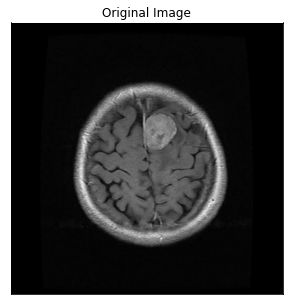

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


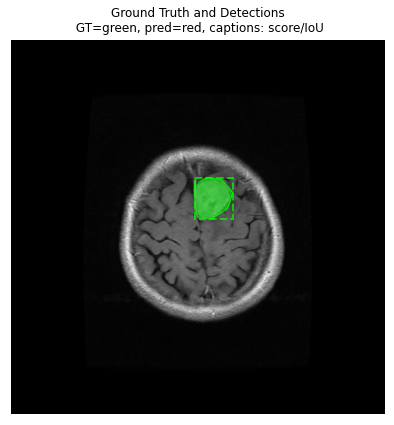

In [ ]:
#Test Set
%matplotlib inline # çıktının ekrana görüntü olarak bastırılması için gerekli komut

ind = 18
display_image(dataset_test, ind)
predict_and_plot_differences(dataset_test, ind)

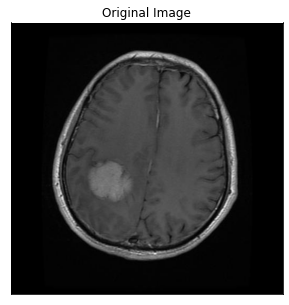

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


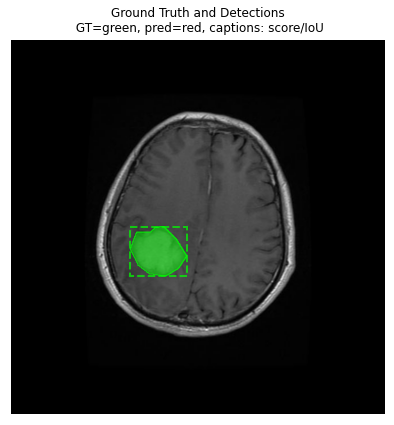

In [ ]:
#Test Set
%matplotlib inline

ind = 10
display_image(dataset_test, ind)
predict_and_plot_differences(dataset_test, ind)

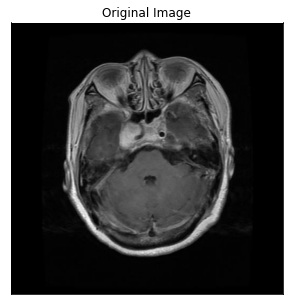

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


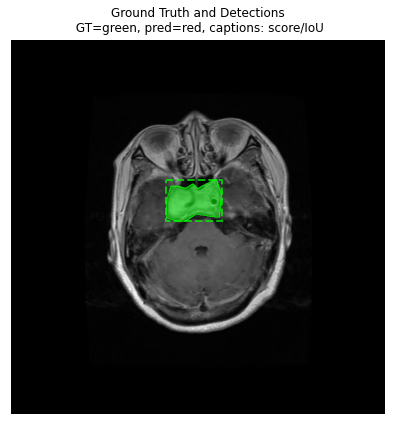

In [ ]:
# test set
%matplotlib inline

ind = 1
display_image(dataset_test, ind)
predict_and_plot_differences(dataset_test, ind)

## **Index numarası girerek girdiğiniz index'e ait MR Görüntüsünü ve Segmente edilmiş halini ekrana bastıran kod**

In [ ]:
%matplotlib inline

veriseti = int(input("Test seti için 1'i, Validation Set için 2'yi giriniz: "))

if veriseti == 1:
    ind = int(input("Test setine ait MR Görüntülerinden tümör tespitini istediğiniz index numarasını giriniz: "))

    display_image(dataset_test, ind)
    predict_and_plot_differences(dataset_test, ind)

elif veriseti == 2:
    ind = int(input("Test setine ait MR Görüntülerinden tümör tespitini istediğiniz index numarasını giriniz: "))

    display_image(dataset_val, ind)
    predict_and_plot_differences(dataset_val, ind)

else:
    print("Gecersiz bir numara girdiniz!")

# 4- **KARAR DESTEK SİSTEMİ**
---

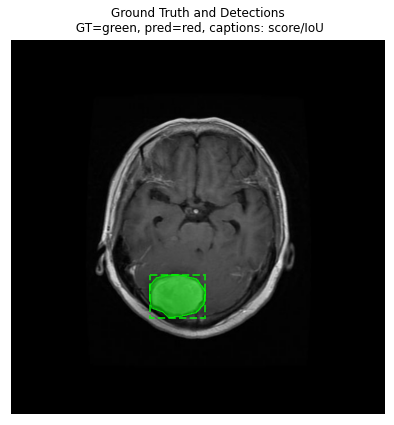

In [ ]:
from ipywidgets.widgets.widget_button import ButtonStyle
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

fileupload = widgets.FileUpload(accept='', multiple=False)

button_send = widgets.Button(
                description='Tümör Tespiti',
                tooltip='Send',
                style={'description_width': 'initial'},
                button_style="primary"
            )

def on_button(event):
    with output:
        keys = [*fileupload.value]
        filename = keys[0]
        a = filename.split('.jpg')
        ind = int(a[0])

        print("\nTumor segmentasyonu istenen MR görüntüsü")
        print("-----------------------------------------")
        display_image(dataset_test, ind) # Orijinal MR Görüntüsü

        print("\nTumor segmentasyonu")
        print("-----------------------------------------------")
        predict_and_plot_differences(dataset_test, ind) # Tespit ve Segmentasyon İşlemi

output = widgets.Output()
button_send.on_click(on_button)

vbox_result = widgets.VBox([fileupload, button_send ,output])

text_0 = widgets.HTML(value="<h1>BEYİN TÜMÖRÜ KARAR DESTEK SİSTEMİ</h1>")
text_1 = widgets.HTML(value="<h2>Lütfen Tespitini İstediğiniz MR Görüntüsünü Ekleyiniz</h2>")

vbox_text = widgets.VBox([text_0, text_1, vbox_result])

# Ara yüzün çıktısı
page = widgets.HBox([vbox_text])
display(page)